In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# Load and Merge Data
# ==============================================

# Load main datasets
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')


In [12]:
import warnings
warnings.filterwarnings('ignore')

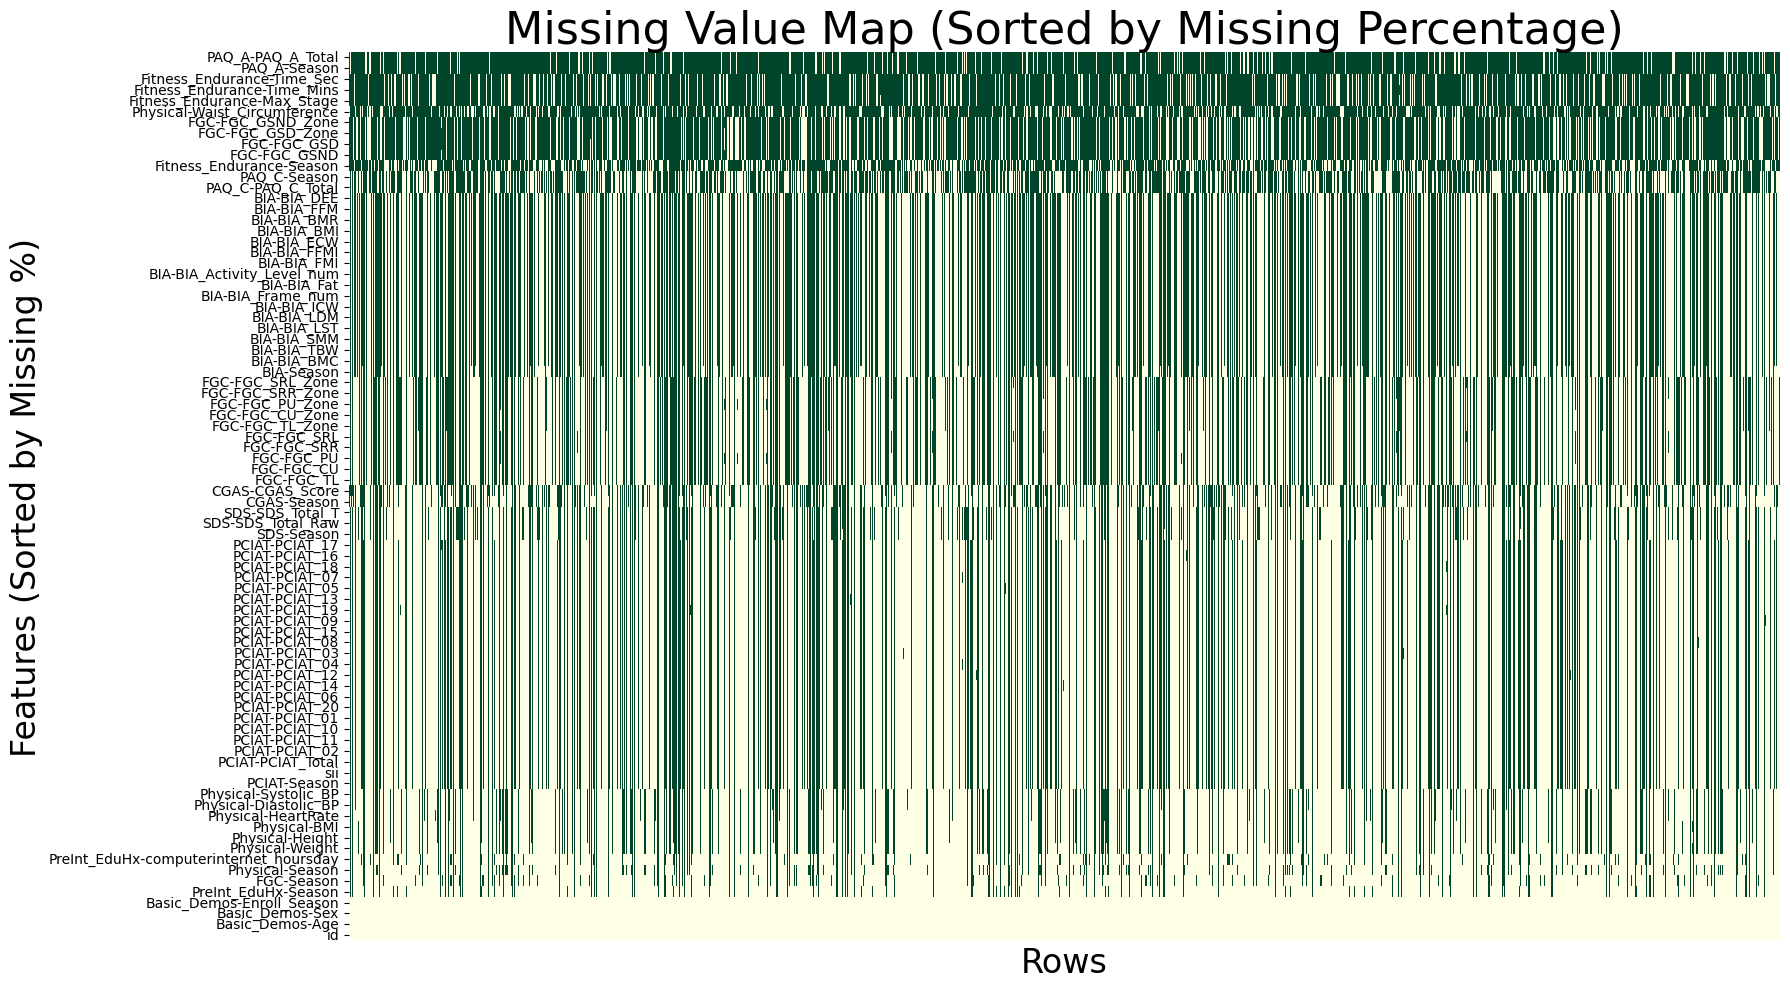

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_percentage = train.isnull().mean()

# Sort the columns by missing value percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False).index

# Reorder the DataFrame based on sorted columns
sorted_missing_data = train[sorted_columns].isnull().transpose()

# Plot the sorted missing values as a heatmap
plt.figure(figsize=(18, 10))  # Adjust size for readability
sns.heatmap(
    sorted_missing_data,
    cmap='YlGn',  # Choose a color map
    cbar=False,      # Disable the color bar
    xticklabels=False,  # Disable x-axis labels for readability
    yticklabels=sorted_missing_data.index,  # Show column names on y-axis
)

# Add titles and labels
plt.title('Missing Value Map (Sorted by Missing Percentage)', fontsize=32, color='Black')
plt.ylabel('Features (Sorted by Missing %)', fontsize=24, color='Black')
plt.xlabel('Rows', fontsize=24, color='Black')

# Show the plot
plt.tight_layout()
output_filename = "Sorted_Missing_Value_Map.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


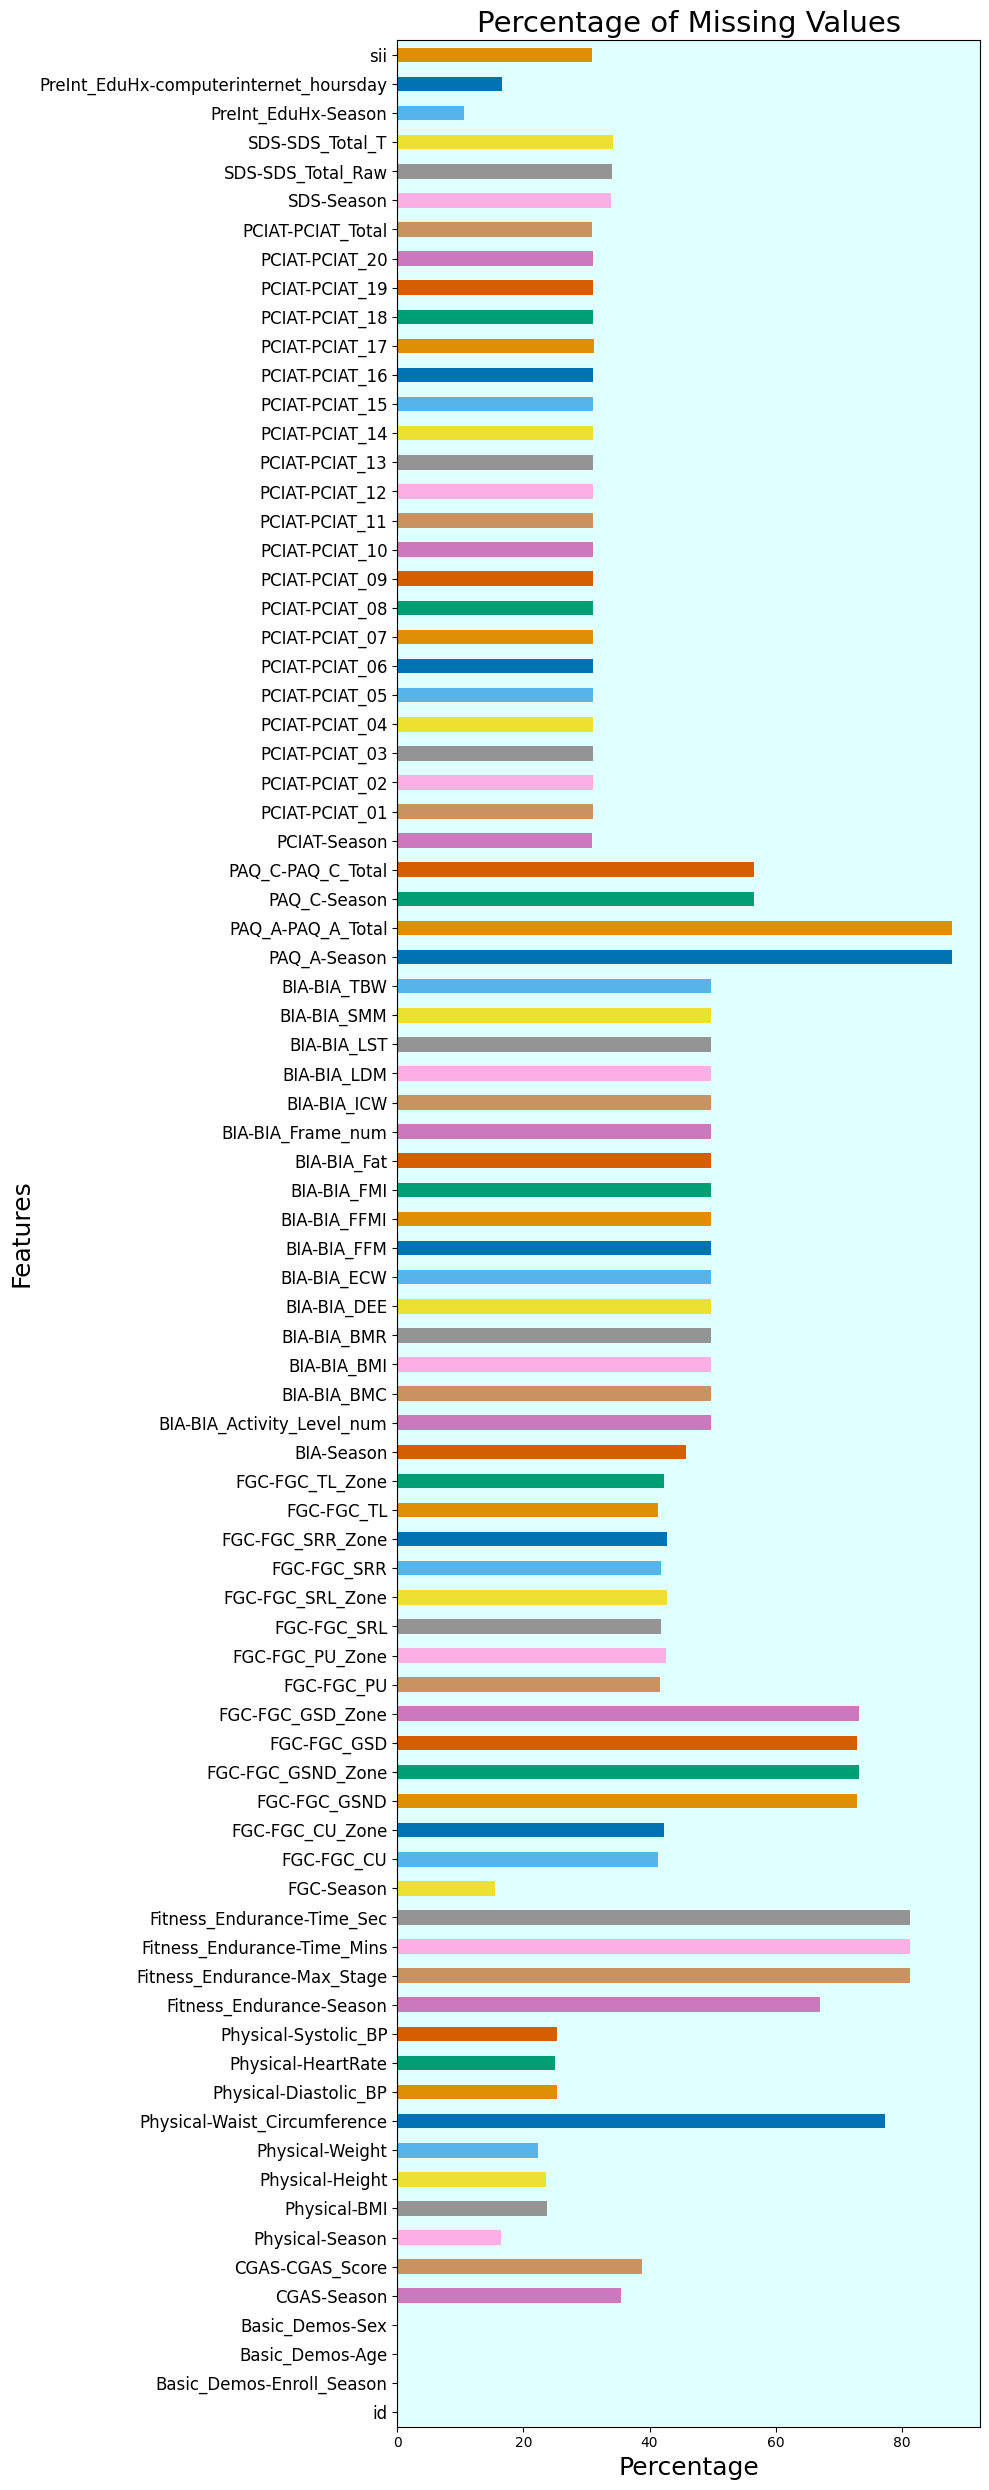

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the missing values percentage
train_col = train.columns.tolist()
test_col = test.columns.tolist()
missing_values = train.isnull().mean() * 100

# Define a colorblind-friendly palette
colorblind_colors = sns.color_palette("colorblind", n_colors=len(missing_values))

# Plot the missing values percentage
missing_values.plot(
    kind='barh', 
    figsize=(10, 25), 
    color=colorblind_colors
)

# Add titles and labels
plt.title('Percentage of Missing Values', fontsize=21, color='Black')
plt.xlabel('Percentage', fontsize=18, color='Black')
plt.ylabel('Features', fontsize=18, color='Black')
plt.gca().set_facecolor('lightcyan')
plt.xticks(rotation=0)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
output_filename = "Percentage_of_Missing_Values.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


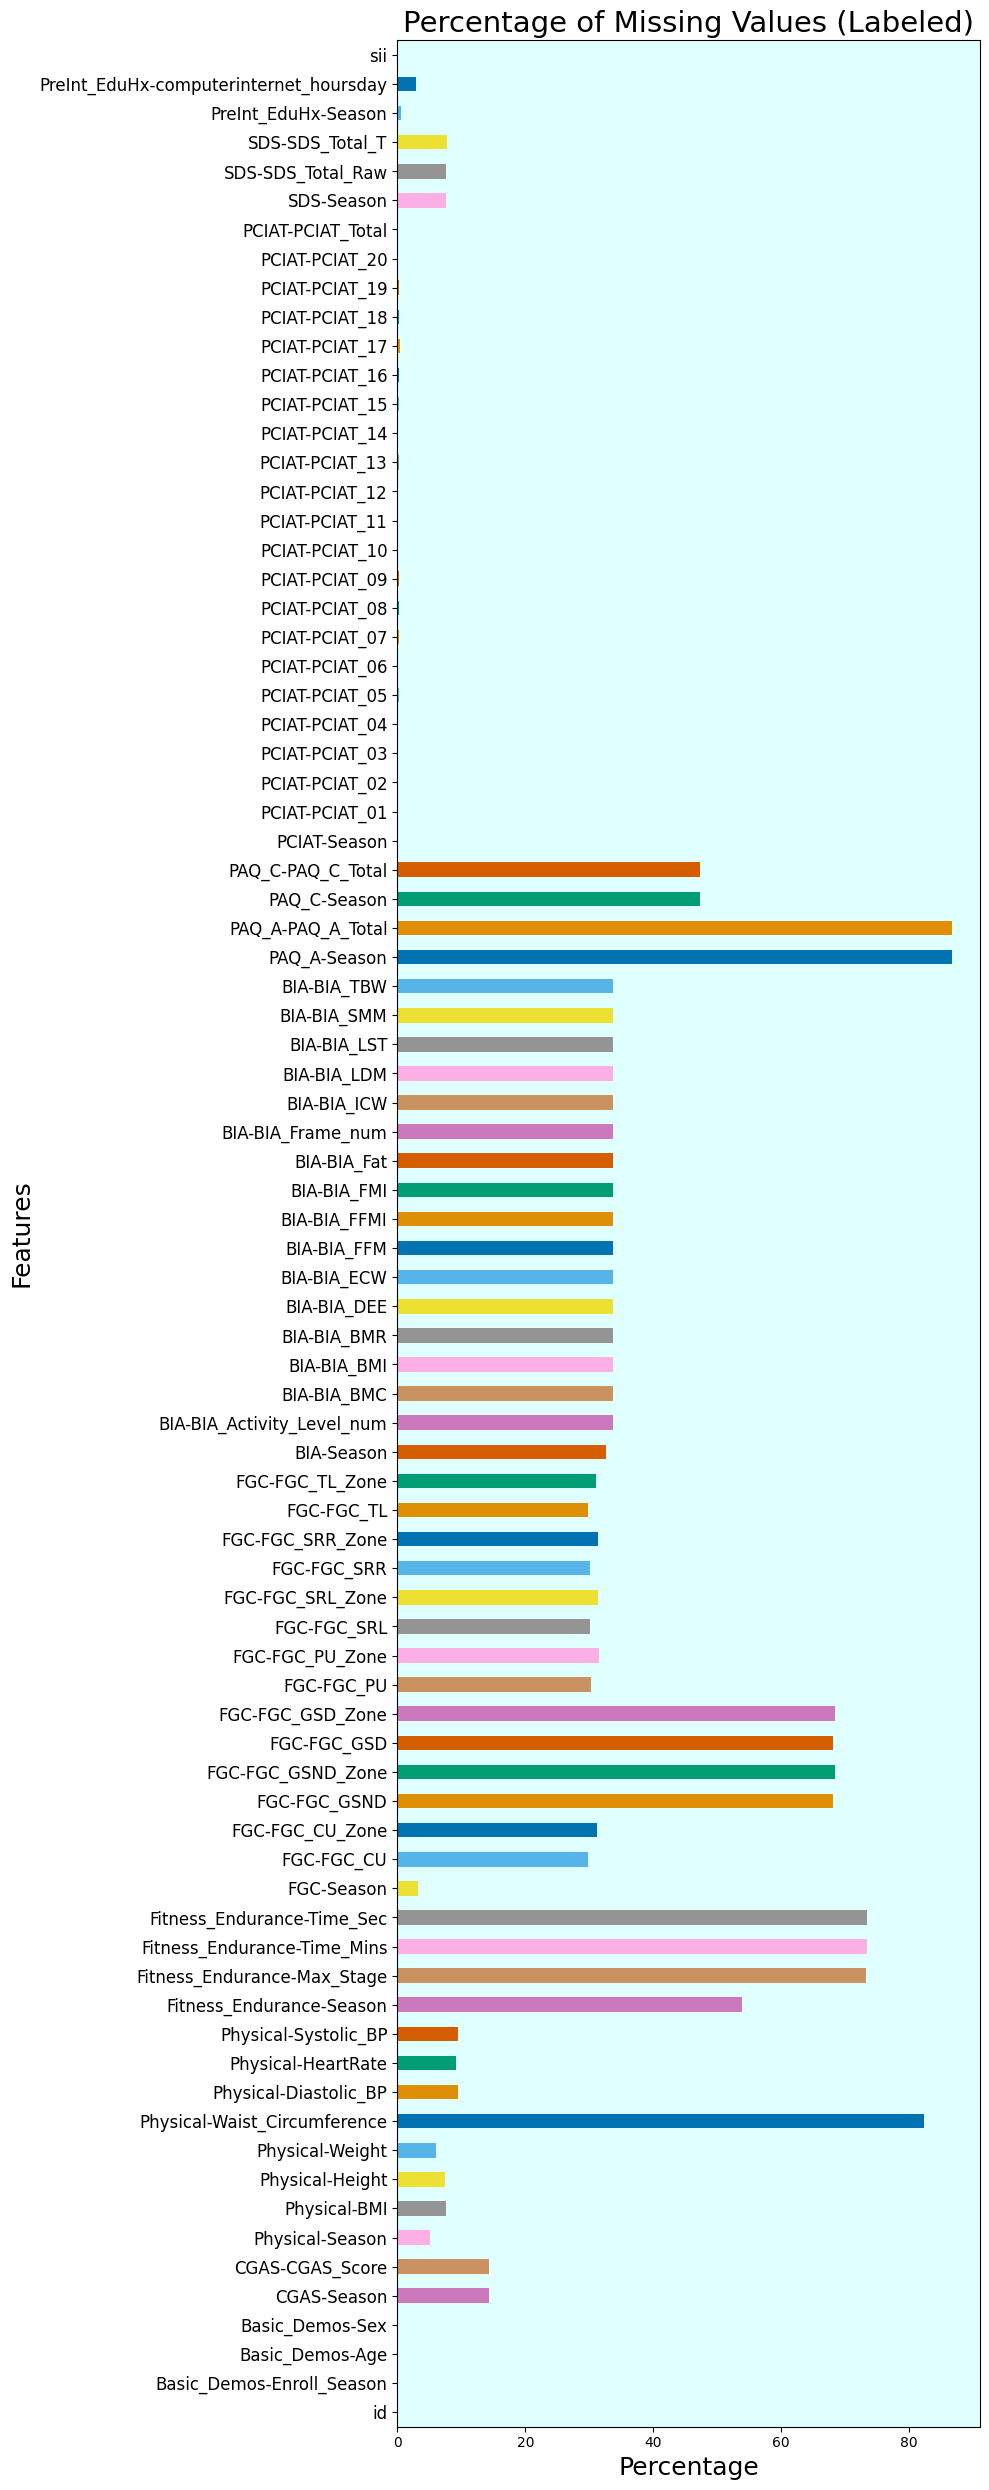

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing target variable 'sii' in train data
train = train.dropna(subset=['sii'])

# Generate the missing values percentage
train_col = train.columns.tolist()
test_col = test.columns.tolist()
missing_values = train.isnull().mean() * 100

# Define a colorblind-friendly palette
colorblind_colors = sns.color_palette("colorblind", n_colors=len(missing_values))

# Plot the missing values percentage
missing_values.plot(
    kind='barh', 
    figsize=(10, 25), 
    color=colorblind_colors
)

# Add titles and labels
plt.title('Percentage of Missing Values (Labeled)', fontsize=21, color='Black')
plt.xlabel('Percentage', fontsize=18, color='Black')
plt.ylabel('Features', fontsize=18, color='Black')
plt.gca().set_facecolor('lightcyan')
plt.xticks(rotation=0)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
output_filename = "Percentage_of_Labeled_Missing_Values.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()

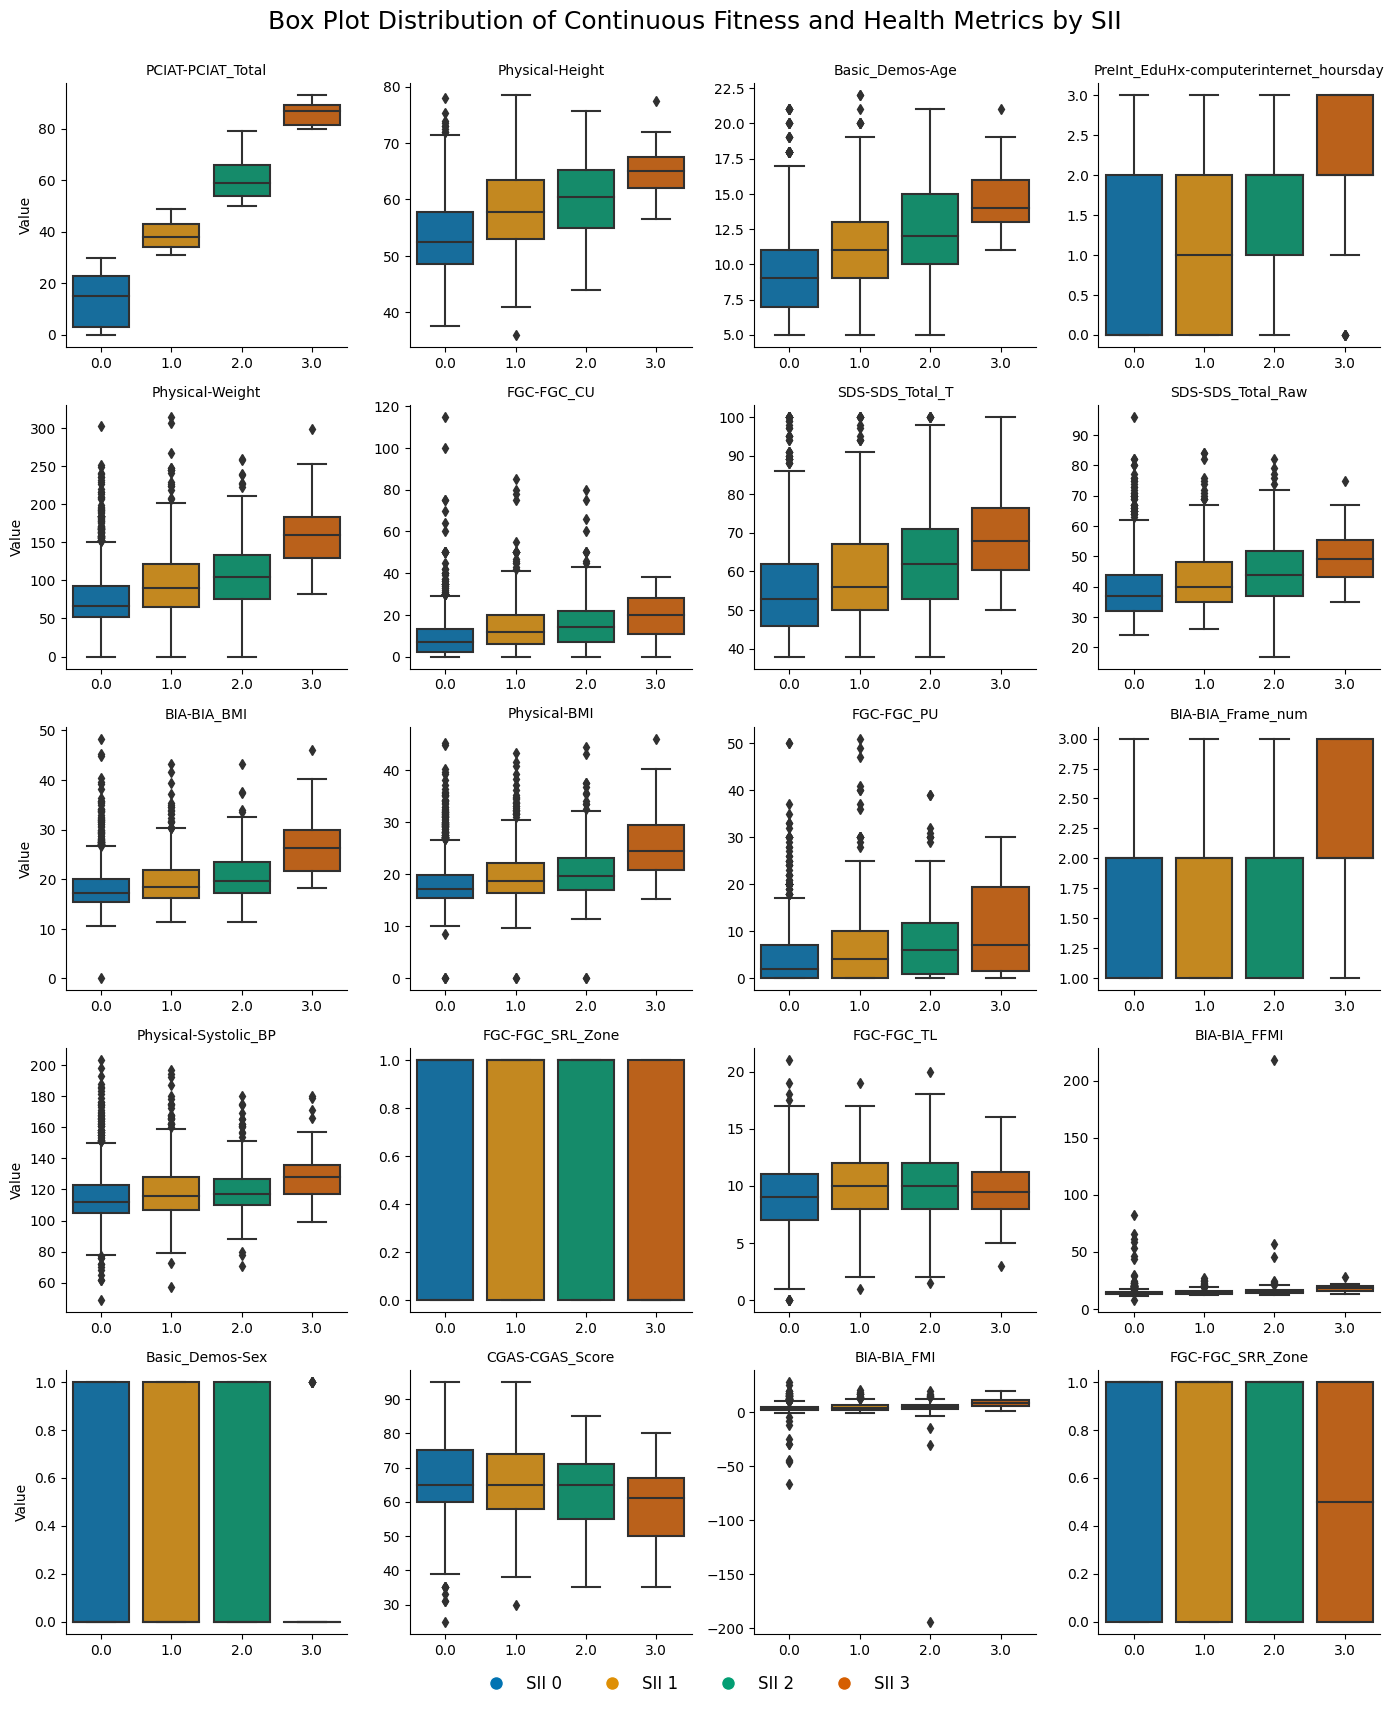

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous columns based on your data
continuous_columns = [
    'PCIAT-PCIAT_Total', 'Physical-Height', 'Basic_Demos-Age',
    'PreInt_EduHx-computerinternet_hoursday', 'Physical-Weight',
    'FGC-FGC_CU', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'BIA-BIA_BMI',
    'Physical-BMI', 'FGC-FGC_PU', 'BIA-BIA_Frame_num',
    'Physical-Systolic_BP', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL',
    'BIA-BIA_FFMI', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'BIA-BIA_FMI',
    'FGC-FGC_SRR_Zone'
]

# Melt the data to long format for seaborn
data_long = pd.melt(train, id_vars='sii', value_vars=continuous_columns, 
                    var_name='Variable', value_name='Value')

# Set up the FacetGrid for box plots
g = sns.FacetGrid(data_long, col="Variable", col_wrap=4, height=3.5, aspect=1, sharex=False, sharey=False)

# Map the box plot to the grid
g.map(sns.boxplot, 'sii', 'Value', palette="colorblind", linewidth=1.5)

# Customize the plot
g.fig.suptitle("Box Plot Distribution of Continuous Fitness and Health Metrics by SII", y=0.95, fontsize=18, color="Black")
g.set_titles("{col_name}")
g.set_axis_labels("", "Value")  # Remove x-axis labels

# Add a legend on top
sii_classes = sorted(train['sii'].unique())
legend_labels = [f"SII {int(cls)}" for cls in sii_classes]
colors = sns.color_palette("colorblind", len(sii_classes))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
           for color, label in zip(colors, legend_labels)]

g.fig.legend(handles=handles, loc="lower center", ncol=len(sii_classes), frameon=False, fontsize=12, bbox_to_anchor=(0.5, -0.02))
# g.fig.legend(handles=legend_elements, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05), frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add extra space at the top for the legend
output_filename = "sii_class_distribution_box_plots.jpg"
plt.savefig(
    output_filename, 
    dpi=600, 
    format="jpg", 
    bbox_inches='tight', 
    bbox_extra_artists=[g.fig._suptitle, g.fig.legends[0]]  # Include title and legend explicitly
)
plt.show()


In [8]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

# Define featuresCols as the common columns between train and test
featuresCols = list(set(train.columns).intersection(set(test.columns)))

# Select the features from train and test datasets
train = train[featuresCols + ['sii']]  # Include 'sii' in train features
test = test[featuresCols]

# Drop 'id' from train and test data if present
train = train.drop('id', axis=1, errors='ignore')
test = test.drop('id', axis=1, errors='ignore')

# Drop rows with missing target variable 'sii' in train data
train = train.dropna(subset=['sii'])

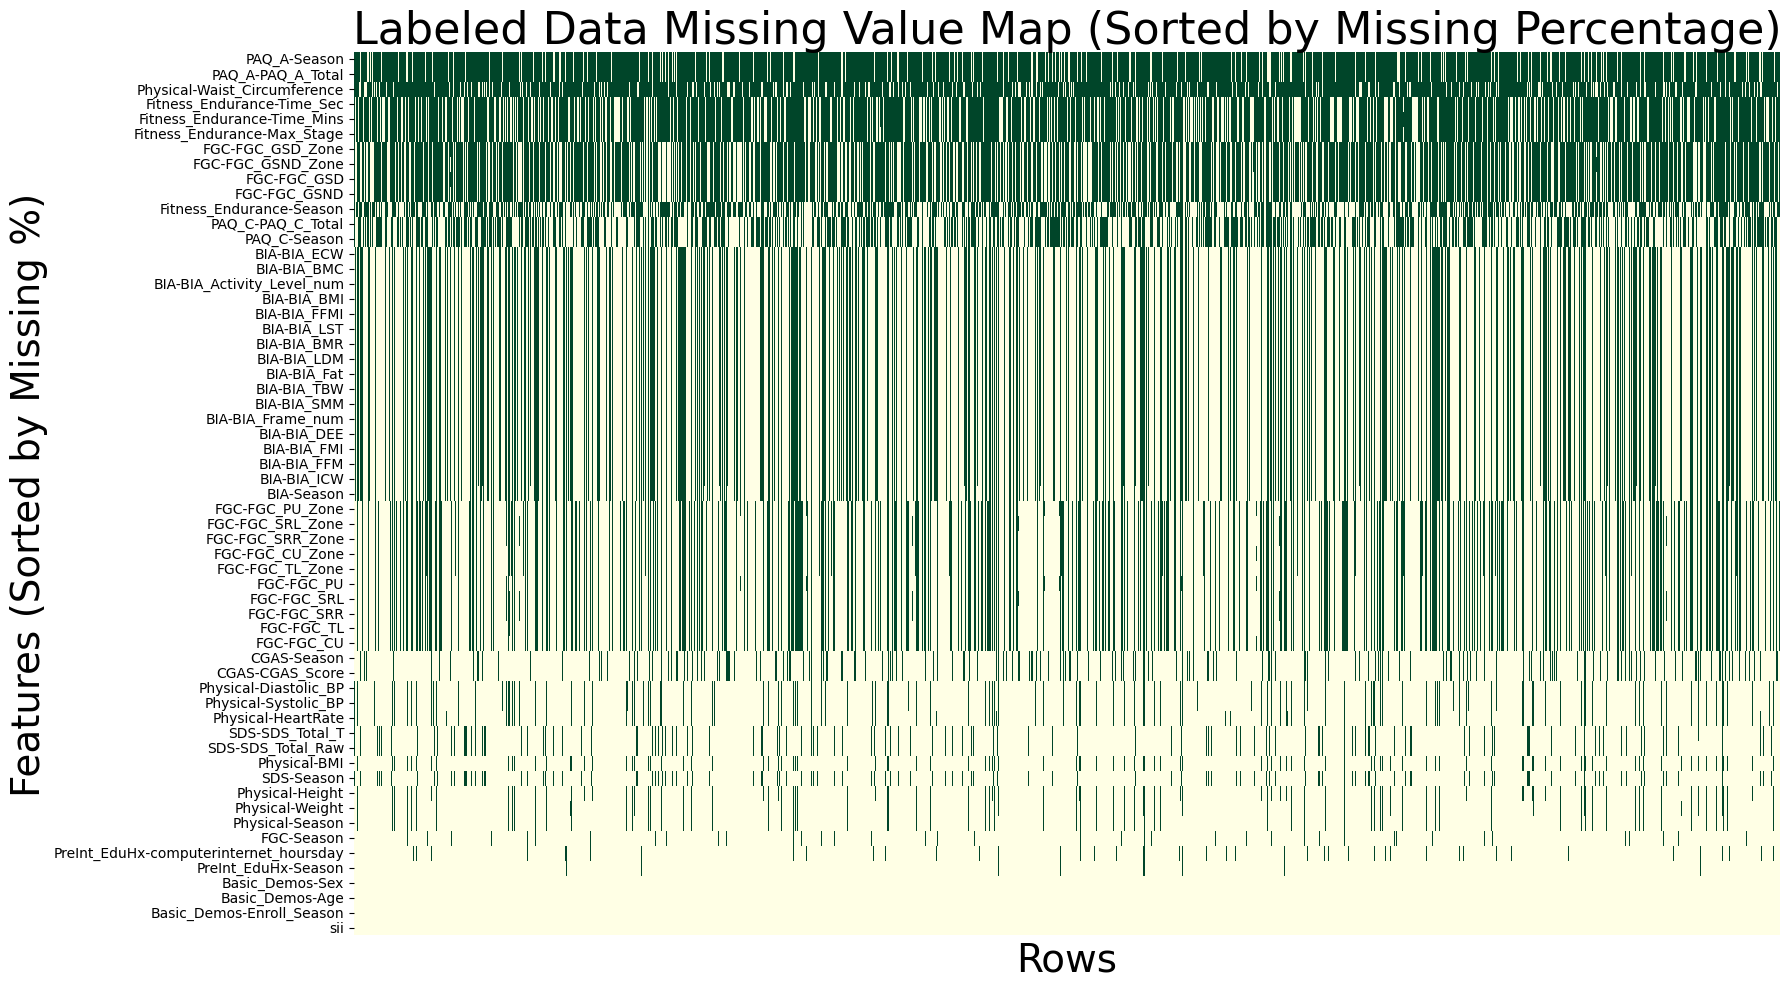

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_percentage = train.isnull().mean()

# Sort the columns by missing value percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False).index

# Reorder the DataFrame based on sorted columns
sorted_missing_data = train[sorted_columns].isnull().transpose()

# Plot the sorted missing values as a heatmap
plt.figure(figsize=(18, 10))  # Adjust size for readability
sns.heatmap(
    sorted_missing_data,
    cmap='YlGn',  # Choose a color map
    cbar=False,      # Disable the color bar
    xticklabels=False,  # Disable x-axis labels for readability
    yticklabels=sorted_missing_data.index,  # Show column names on y-axis
)

# Add titles and labels
plt.title('Labeled Data Missing Value Map (Sorted by Missing Percentage)', fontsize=32, color='Black')
plt.ylabel('Features (Sorted by Missing %)', fontsize=28, color='Black')
plt.xlabel('Rows', fontsize=28, color='Black')

# Show the plot
plt.tight_layout()
output_filename = "Labeled_Missing_Value_Map.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


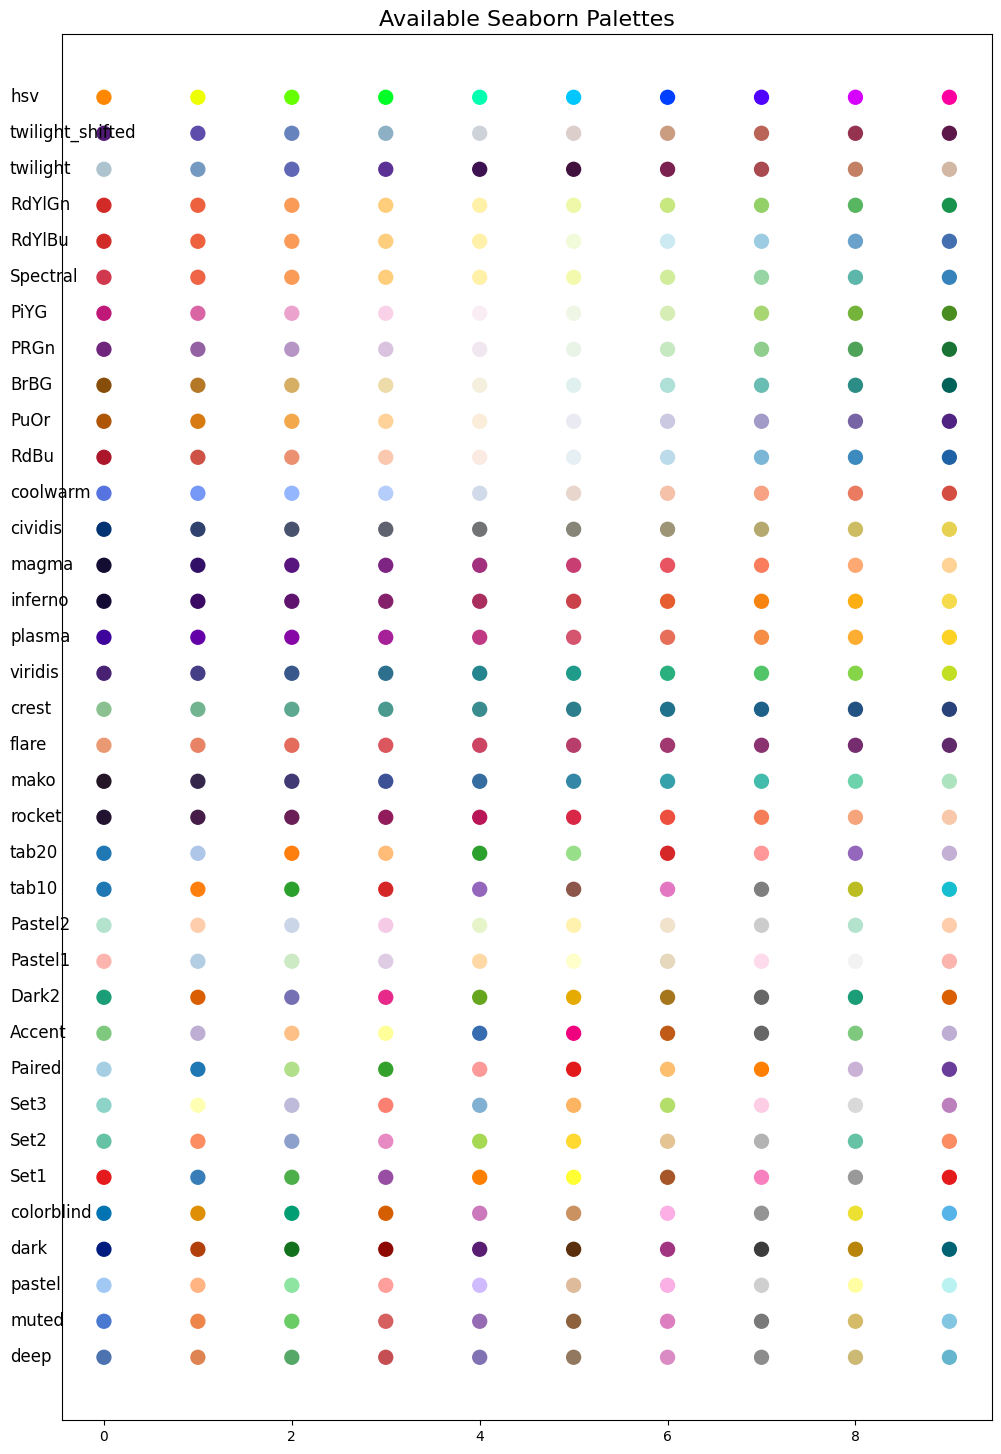

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

palettes = [
    "deep", "muted", "pastel", "dark", "colorblind", "Set1", "Set2", "Set3",
    "Paired", "Accent", "Dark2", "Pastel1", "Pastel2", "tab10", "tab20",
    "rocket", "mako", "flare", "crest", "viridis", "plasma", "inferno",
    "magma", "cividis", "coolwarm", "RdBu", "PuOr", "BrBG", "PRGn",
    "PiYG", "Spectral", "RdYlBu", "RdYlGn", "twilight", "twilight_shifted", "hsv"
]

plt.figure(figsize=(12, len(palettes) / 2))
for i, palette in enumerate(palettes):
    colors = sns.color_palette(palette, 10)
    plt.scatter(range(len(colors)), [i] * len(colors), c=colors, s=100)
    plt.text(-1, i, palette, fontsize=12, va='center')

plt.yticks([])
plt.title("Available Seaborn Palettes", fontsize=16)
plt.show()


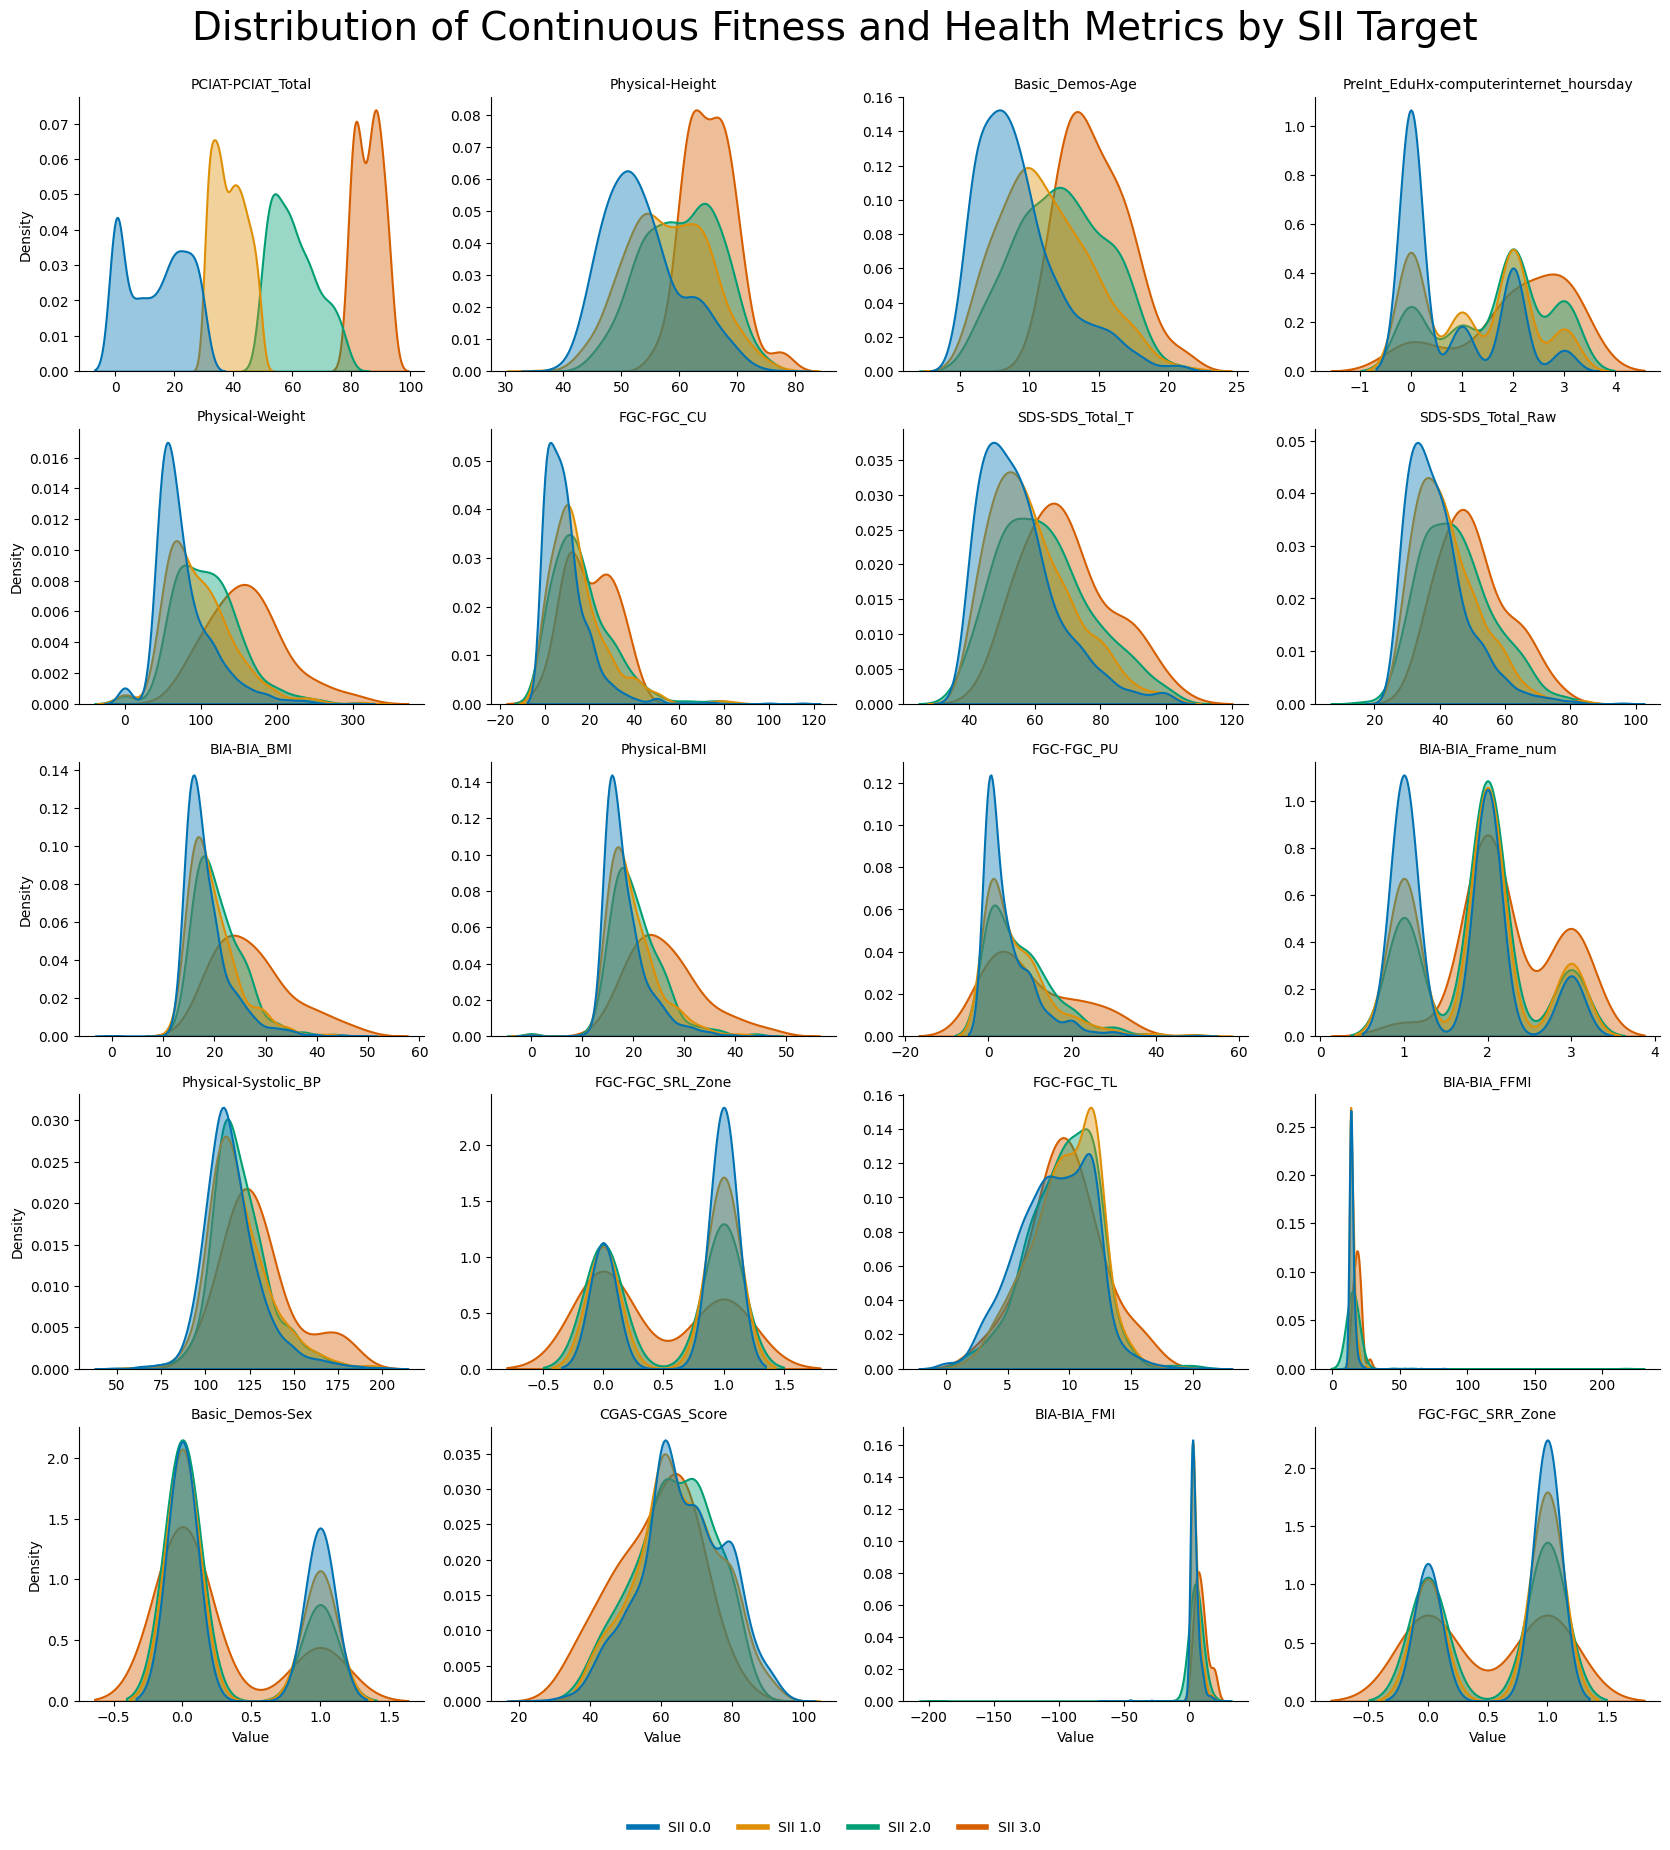

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D for custom legend elements

# Load main datasets
train_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

# List of continuous columns based on your data
continuous_columns = [
    'PCIAT-PCIAT_Total', 'Physical-Height', 'Basic_Demos-Age',
    'PreInt_EduHx-computerinternet_hoursday', 'Physical-Weight',
    'FGC-FGC_CU', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'BIA-BIA_BMI',
    'Physical-BMI', 'FGC-FGC_PU', 'BIA-BIA_Frame_num',
    'Physical-Systolic_BP', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL',
    'BIA-BIA_FFMI', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'BIA-BIA_FMI',
    'FGC-FGC_SRR_Zone'
]

# Select only the continuous columns and the sii target
data_continuous = train_df[continuous_columns + ['sii']]

# Remove rows where sii is NaN, but keep NaNs in continuous variables
data_continuous = data_continuous.dropna(subset=['sii'])

# Melt the data to long format for Seaborn
data_long = pd.melt(data_continuous, id_vars='sii', var_name="variable", value_name="value")

# Set up the FacetGrid for KDE plots with increased figure size
g = sns.FacetGrid(data_long, col="variable", col_wrap=4, height=3.5, aspect=1.2, sharex=False, sharey=False)

# Map KDE plots onto the grid, using hue for sii target
g.map_dataframe(sns.kdeplot, x="value", hue="sii", fill=True, common_norm=False, palette="colorblind", alpha=0.4, linewidth=1.5)

# Add title, adjust layout
g.fig.suptitle("Distribution of Continuous Fitness and Health Metrics by SII Target", y=1.0, fontsize=28, color='Black')
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Density")

# Create custom legend
# Define the labels and colors (matching `palette="Set2"` used above)
sii_labels = sorted(data_continuous['sii'].dropna().unique())
colors = sns.color_palette("colorblind", len(sii_labels))
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'SII {label}') for color, label in zip(colors, sii_labels)]

# Position the custom legend outside of the grid
g.fig.legend(handles=legend_elements, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05), frameon=False)

plt.tight_layout()
output_filename = "sii_class_distribution_continuous.jpg"
plt.savefig(
    output_filename, 
    dpi=600, 
    format="jpg", 
    bbox_inches='tight', 
    bbox_extra_artists=[g.fig._suptitle, g.fig.legends[0]]  # Include title and legend explicitly
)
plt.show()


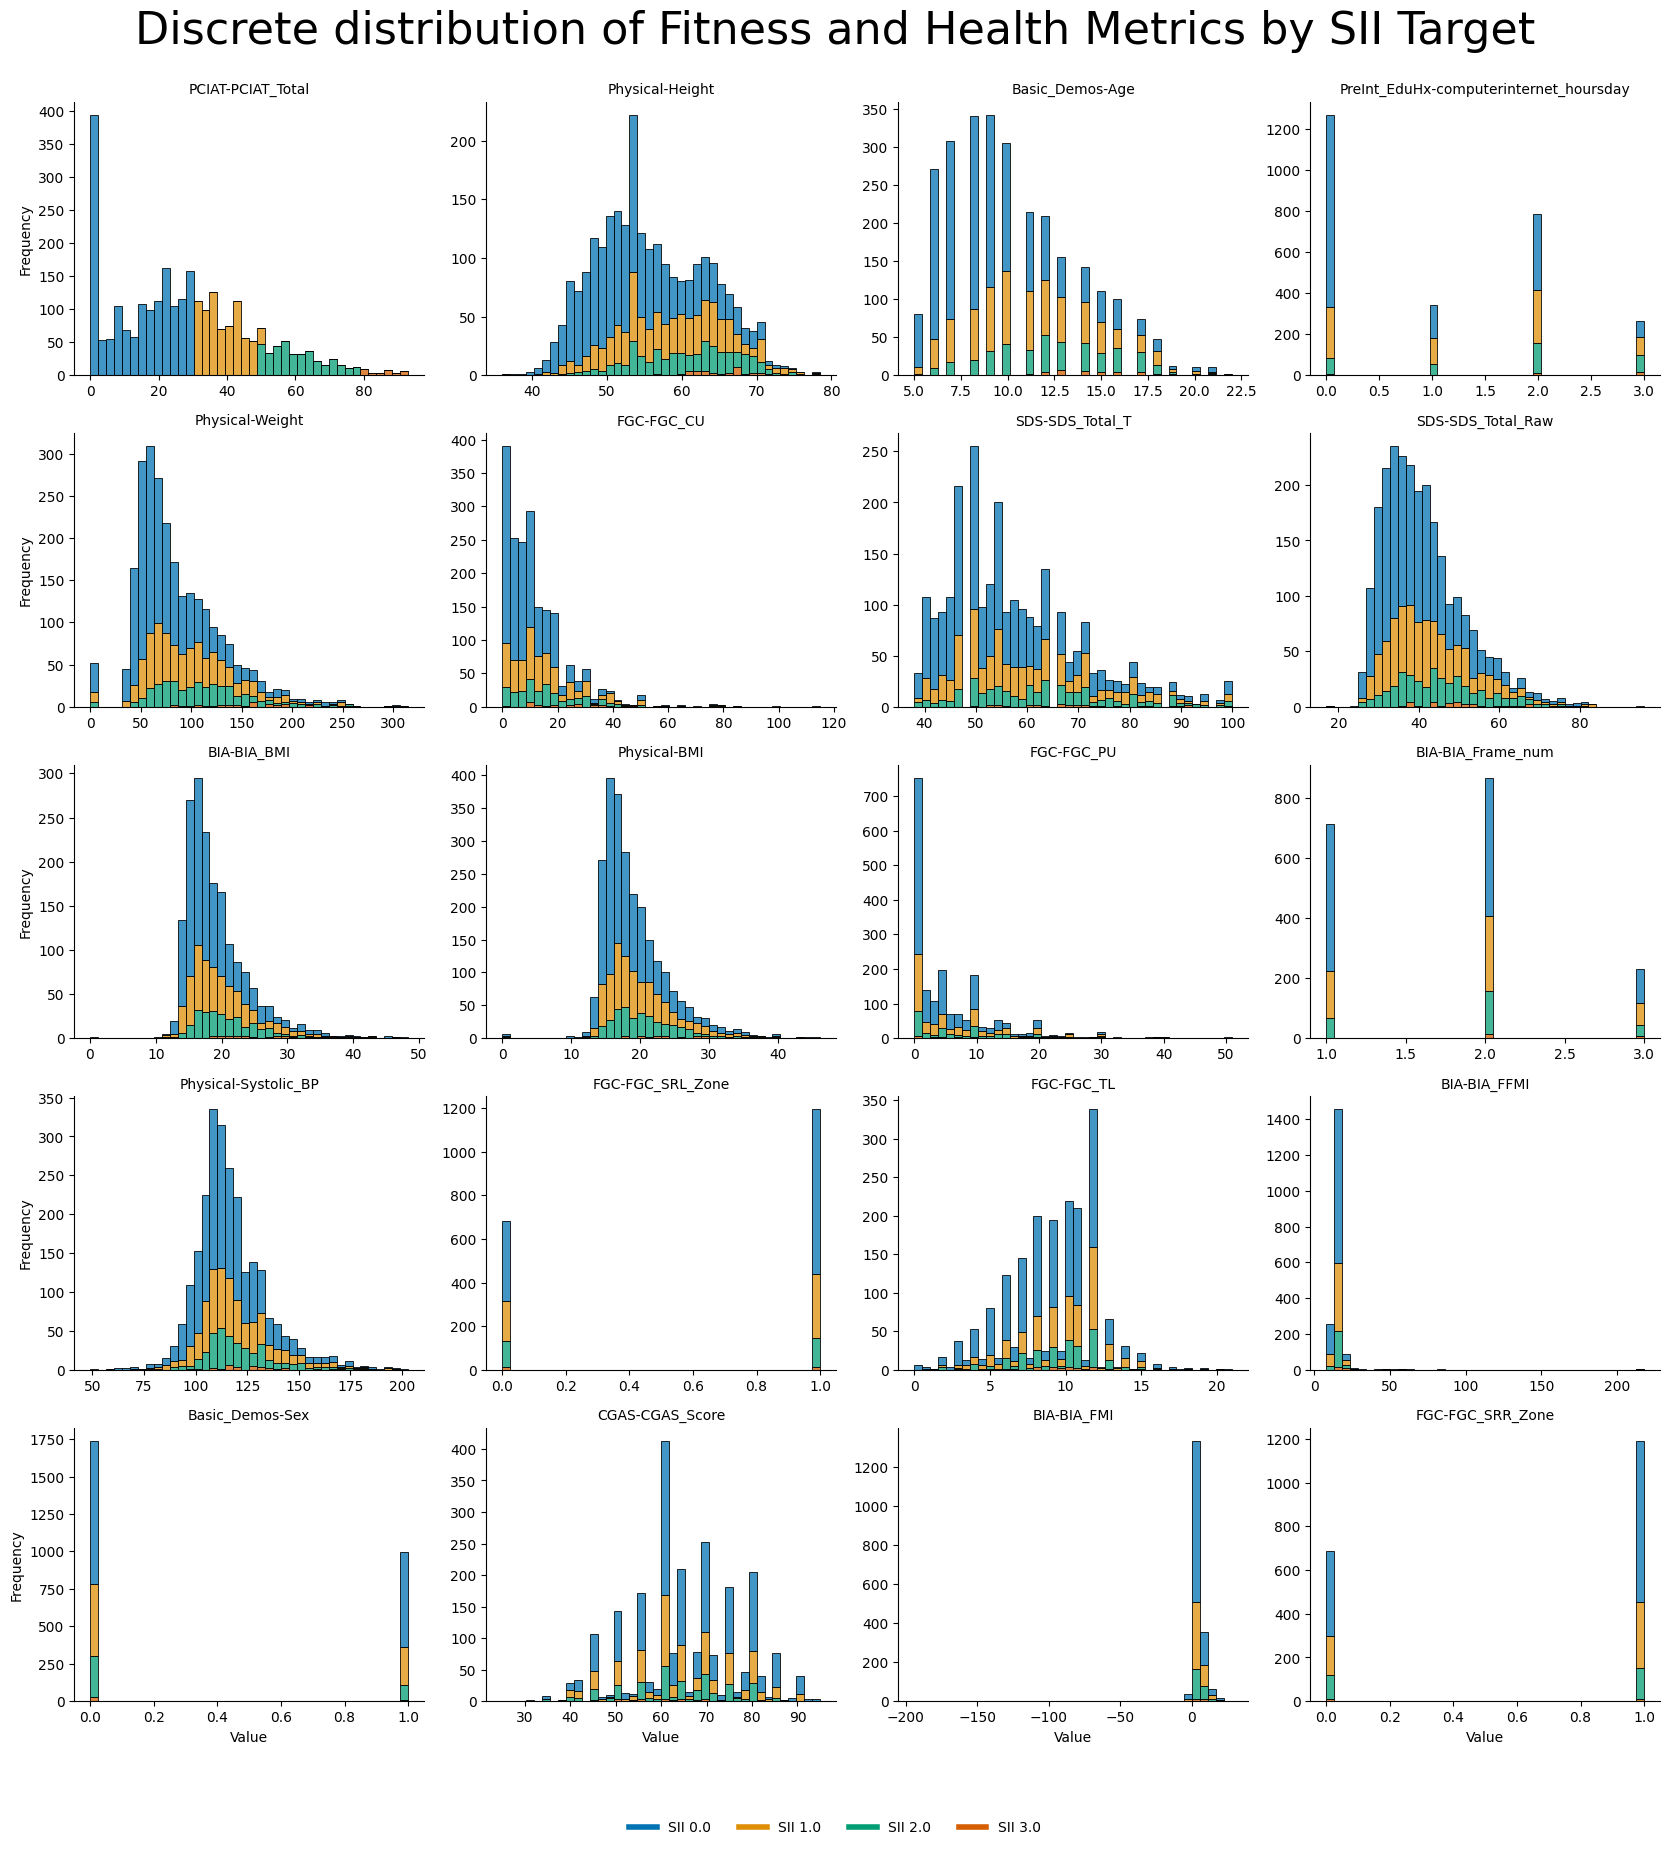

In [29]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D for custom legend elements
import seaborn as sns
import pandas as pd

# Load main datasets
train_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

# List of continuous columns based on your data
continuous_columns = [
    'PCIAT-PCIAT_Total', 'Physical-Height', 'Basic_Demos-Age',
    'PreInt_EduHx-computerinternet_hoursday', 'Physical-Weight',
    'FGC-FGC_CU', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'BIA-BIA_BMI',
    'Physical-BMI', 'FGC-FGC_PU', 'BIA-BIA_Frame_num',
    'Physical-Systolic_BP', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL',
    'BIA-BIA_FFMI', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'BIA-BIA_FMI',
    'FGC-FGC_SRR_Zone'
]

# Select only the continuous columns and the sii target
data_continuous = train_df[continuous_columns + ['sii']]

# Remove rows where sii is NaN, but keep NaNs in continuous variables
data_continuous = data_continuous.dropna(subset=['sii'])

# Melt the data to long format for Seaborn
data_long = pd.melt(data_continuous, id_vars='sii', var_name="variable", value_name="value")

# Set up the FacetGrid for Histogram with Step
g = sns.FacetGrid(data_long, col="variable", col_wrap=4, height=3.5, aspect=1.2, sharex=False, sharey=False)

g.map_dataframe(
    sns.histplot,
    x="value",
    hue="sii",
    palette="colorblind",
    multiple="stack",  # Stacks the histograms for better class distinction
    bins=40,  # Adjust bins to control granularity
    edgecolor="black"
)

# Add title and adjust layout
g.fig.suptitle("Discrete distribution of Fitness and Health Metrics by SII Target", y=1.00, fontsize=32, color='Black')
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")

# Create custom legend
sii_labels = sorted(data_continuous['sii'].dropna().unique())
colors = sns.color_palette("colorblind", len(sii_labels))
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'SII {label}') for color, label in zip(colors, sii_labels)]

# Position the custom legend outside of the grid
g.fig.legend(handles=legend_elements, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05), frameon=False)

# Save the plot as a high-resolution JPG
plt.tight_layout()
output_filename = "sii_class_distribution_discrete.jpg"
plt.savefig(
    output_filename, 
    dpi=600, 
    format="jpg", 
    bbox_inches='tight', 
    bbox_extra_artists=[g.fig._suptitle, g.fig.legends[0]]  # Include title and legend explicitly
)
plt.show()


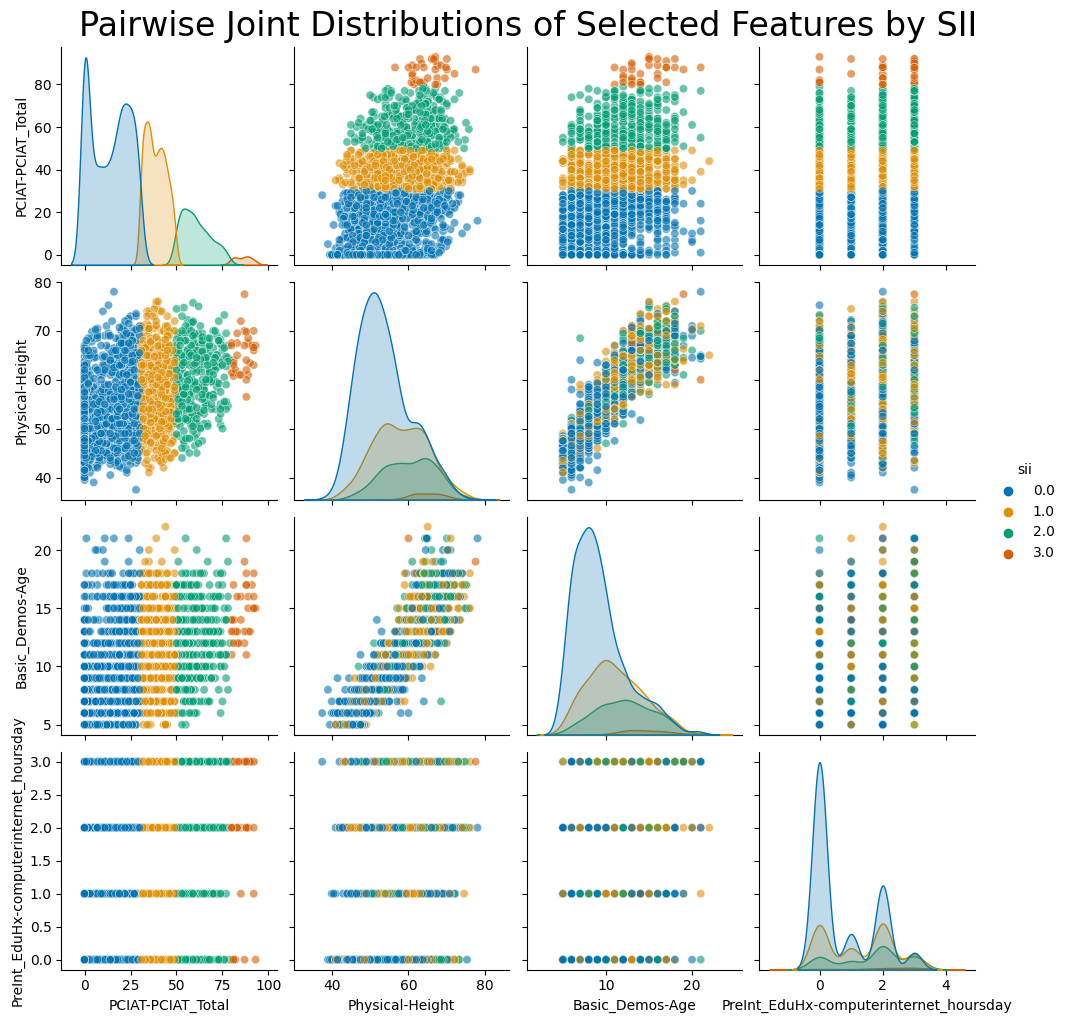

In [30]:
# Select a subset of continuous columns for pairwise visualization (to avoid overcrowding)
selected_columns = ['PCIAT-PCIAT_Total', 'Physical-Height', 'Basic_Demos-Age',
    'PreInt_EduHx-computerinternet_hoursday']

# Include the sii column for hue
pairplot_data = train_df[selected_columns + ['sii']].dropna()

# Pairplot with hue based on 'sii'
sns.pairplot(pairplot_data, hue='sii', palette="colorblind", diag_kind='kde', plot_kws={'alpha': 0.6})

# Set title
plt.suptitle("Pairwise Joint Distributions of Selected Features by SII", y=1.02, fontsize=24)
output_filename = "sii_class_joint_distribution.jpg"
plt.savefig(
    output_filename, 
    dpi=600, 
    format="jpg", 
    bbox_inches='tight' 
)
plt.show()


In [31]:
# Define the threshold percentage
threshold = 50  # Adjust this value as needed

# Calculate the percentage of missing values for each column
missing_percentage = train.isnull().mean() * 100

# Identify columns with missing values above the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop these columns from both train and test datasets
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop, errors='ignore')  # Ignore errors if columns are not in test

# Print the results
print(f"Columns removed: {list(columns_to_drop)}")
print(f"New train shape: {train.shape}")
print(f"New test shape: {test.shape}")


Columns removed: ['Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_GSD_Zone', 'Physical-Waist_Circumference', 'Fitness_Endurance-Season', 'PAQ_A-Season', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'PAQ_A-PAQ_A_Total', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND_Zone']
New train shape: (2736, 48)
New test shape: (20, 47)


48 Index(['FGC-FGC_CU', 'BIA-BIA_FFMI', 'FGC-FGC_PU', 'SDS-SDS_Total_Raw',
       'BIA-BIA_FMI', 'SDS-Season', 'BIA-BIA_ICW', 'BIA-BIA_BMR',
       'Physical-Season', 'PAQ_C-PAQ_C_Total', 'FGC-FGC_SRR',
       'FGC-FGC_SRL_Zone', 'BIA-BIA_DEE', 'FGC-FGC_SRR_Zone',
       'Basic_Demos-Age', 'FGC-FGC_PU_Zone', 'Physical-Height',
       'Physical-Systolic_BP', 'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'FGC-FGC_TL',
       'BIA-BIA_SMM', 'BIA-BIA_LDM', 'Basic_Demos-Enroll_Season',
       'Physical-HeartRate', 'BIA-BIA_BMI',
       'PreInt_EduHx-computerinternet_hoursday', 'PAQ_C-Season', 'BIA-BIA_TBW',
       'BIA-BIA_FFM', 'FGC-FGC_SRL', 'Physical-Diastolic_BP',
       'CGAS-CGAS_Score', 'CGAS-Season', 'Physical-BMI', 'FGC-Season',
       'Physical-Weight', 'FGC-FGC_CU_Zone', 'SDS-SDS_Total_T',
       'PreInt_EduHx-Season', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_LST', 'Basic_Demos-Sex', 'BIA-Season', 'BIA-BIA_ECW',
       'BIA-BIA_Activity_Level_num', 'sii'],
      dtype='object')
40

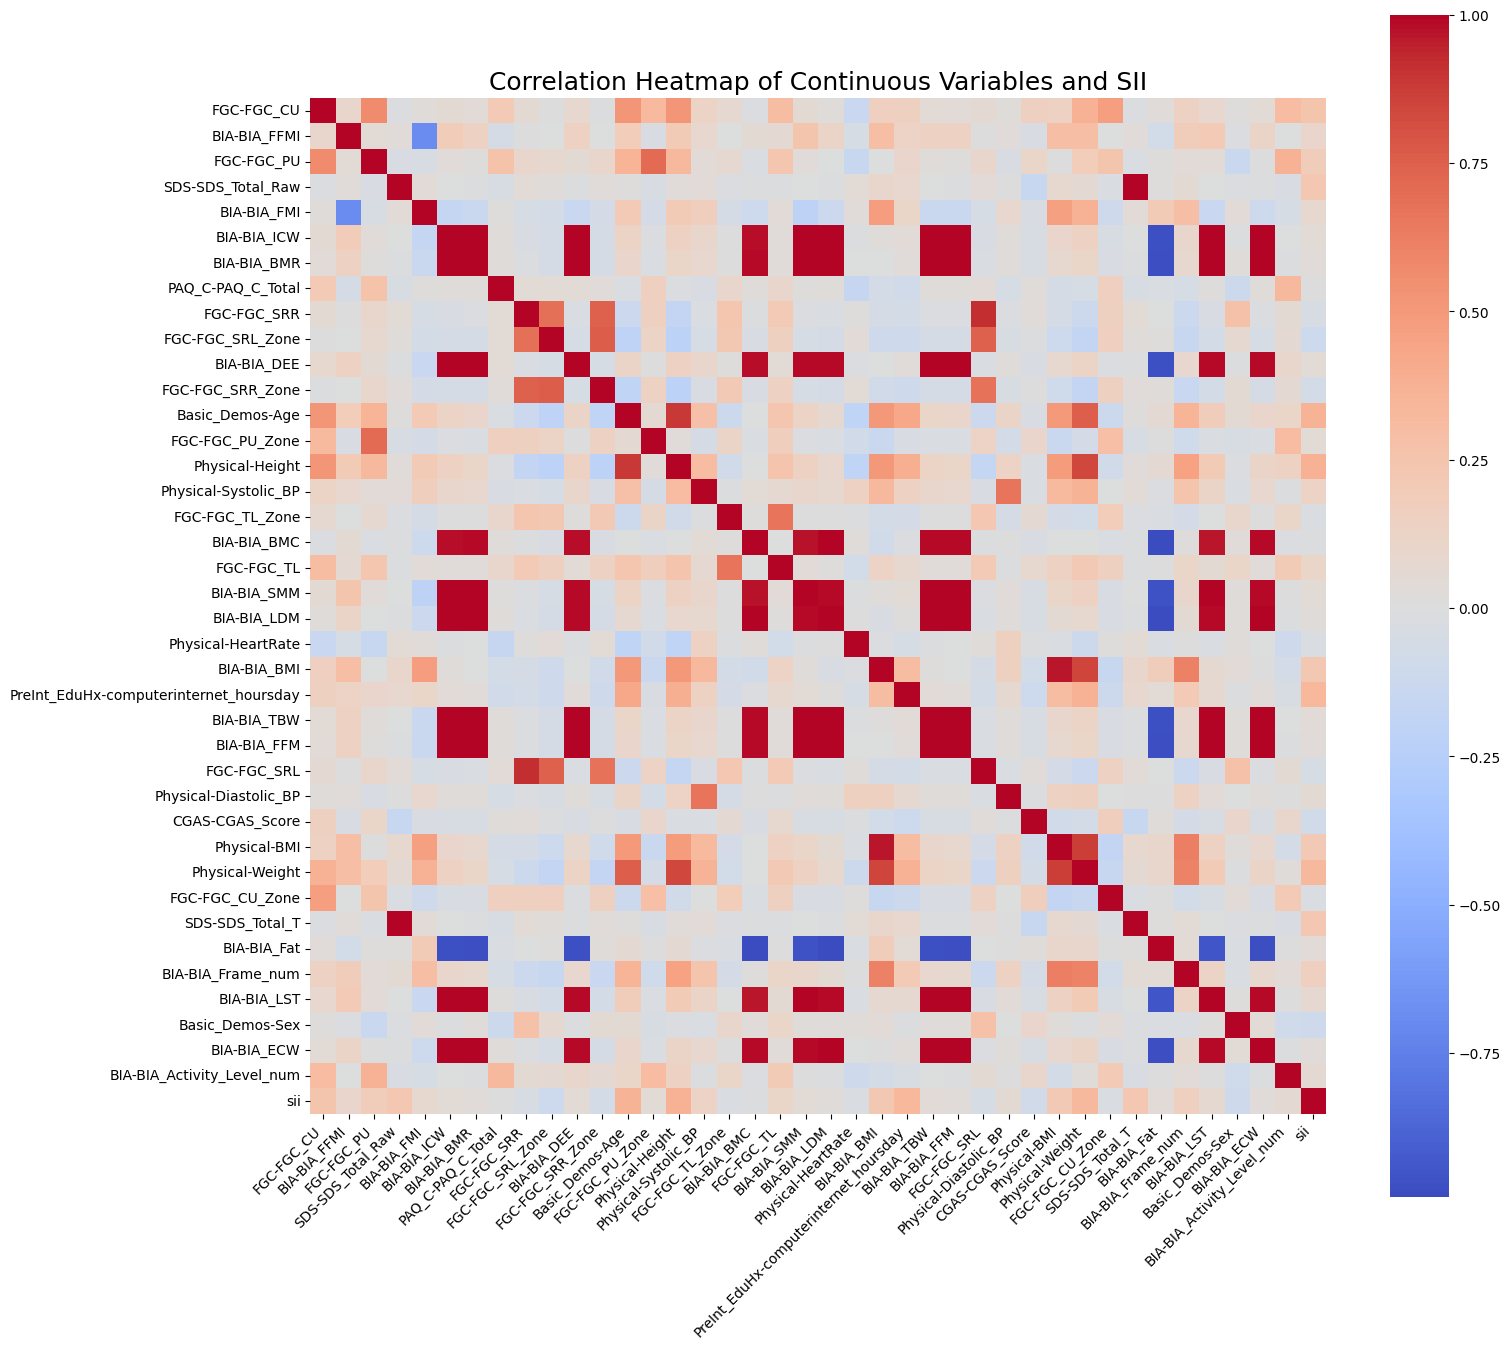

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

print(len(train.columns), train.columns)

print(len(numeric_features), numeric_features)

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title("Correlation Heatmap of Continuous Variables and SII", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
output_filename = "correlation_heatmap.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


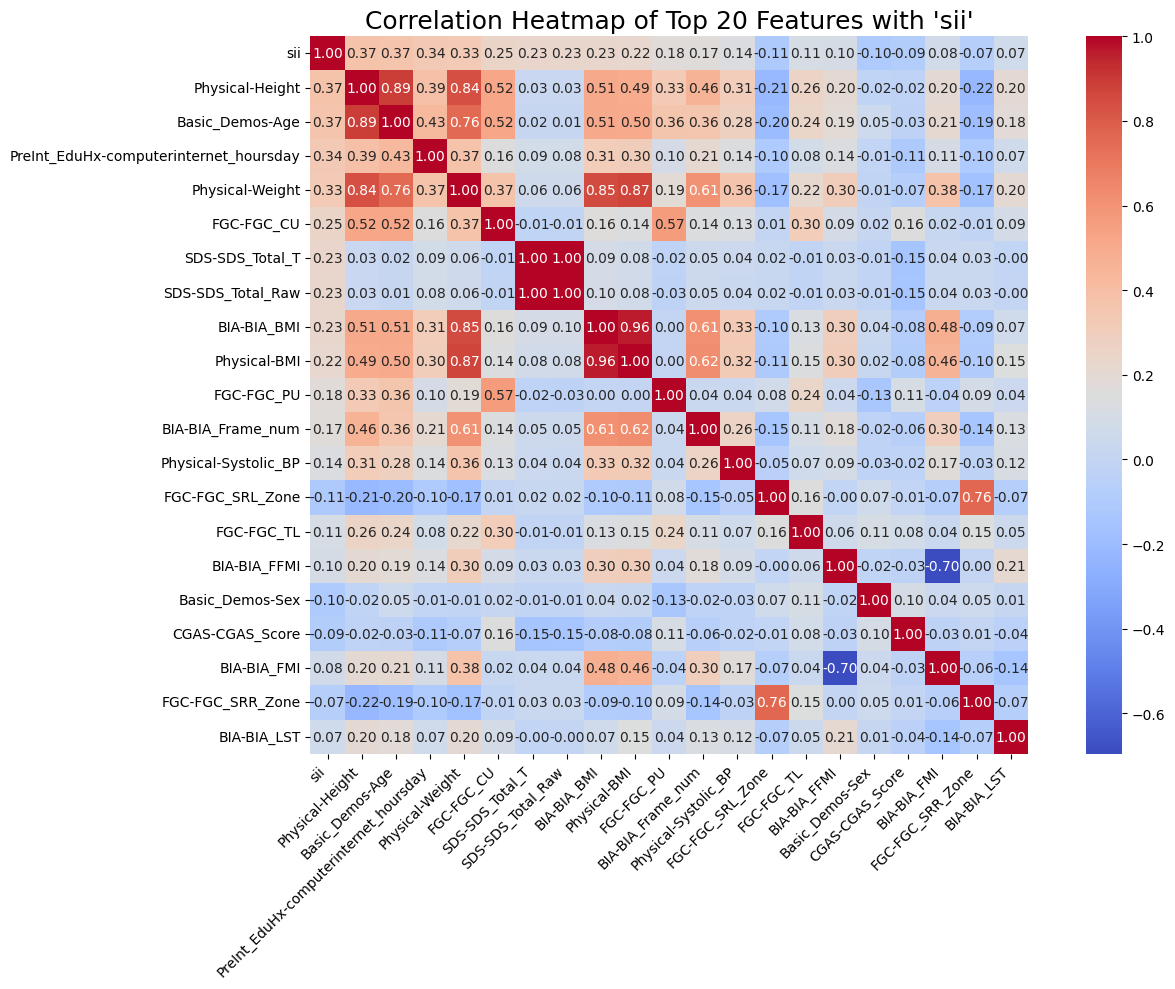

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Choose the target variable
target_variable = 'sii'

# Sort features by their absolute correlation with the target variable
k = 20
top_k_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).head(k + 1).index  # Top k (+1 for `sii`)

# Filter the correlation matrix for the top K features
top_k_corr_matrix = correlation_matrix.loc[top_k_features, top_k_features]

# Plot the heatmap for the top K features
plt.figure(figsize=(14, 10))
sns.heatmap(top_k_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
# sns.heatmap(top_k_corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title(f"Correlation Heatmap of Top {len(top_k_features) - 1} Features with '{target_variable}'", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
output_filename = "top_20_correlation_heatmap.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


In [34]:
top_k_features

Index(['sii', 'Physical-Height', 'Basic_Demos-Age',
       'PreInt_EduHx-computerinternet_hoursday', 'Physical-Weight',
       'FGC-FGC_CU', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'BIA-BIA_BMI',
       'Physical-BMI', 'FGC-FGC_PU', 'BIA-BIA_Frame_num',
       'Physical-Systolic_BP', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL',
       'BIA-BIA_FFMI', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'BIA-BIA_FMI',
       'FGC-FGC_SRR_Zone', 'BIA-BIA_LST'],
      dtype='object')

In [2]:
# ==============================================
# Import Necessary Libraries
# ==============================================
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import clear_output
import warnings

from sklearn.base import clone
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from sklearn.impute import KNNImputer

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from scipy.stats import mode  # For majority voting

# Suppress warnings and set display options
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# ==============================================
# Load and Merge Data
# ==============================================
# Load main datasets
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

# ==============================================
# Feature Engineering
# ==============================================
def engineer_features(df):
    """
    Create interaction features.
    """
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['Pulse_Pressure'] = df['Physical-Systolic_BP'] - df['Physical-Diastolic_BP']
    df['HeartRate_Age'] = df['Physical-HeartRate'] * df['Basic_Demos-Age']
    df['Fitness_Score'] = df['Fitness_Endurance-Max_Stage'] * (
        df['Fitness_Endurance-Time_Mins'] * 60 + df['Fitness_Endurance-Time_Sec']
    )
    df['FMI_FFMI_Ratio'] = df['BIA-BIA_FMI'] / (df['BIA-BIA_FFMI'] + 1e-6)
    df['Sleep_Internet_Hours'] = df['SDS-SDS_Total_T'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['Waist_Height_Ratio'] = df['Physical-Waist_Circumference'] / (df['Physical-Height'] + 1e-6)
    return df

# Apply feature engineering to both train and test datasets
train = engineer_features(train)
test = engineer_features(test)

# ==============================================
# Define Feature Columns
# ==============================================
# Define featuresCols as the common columns between train and test
# featuresCols = list(set(train.columns).intersection(set(test.columns)))
featuresCols = [
    'Internet_Hours_Age', 'Physical-Height', 'Sleep_Internet_Hours', 'Basic_Demos-Age', 
    'BMI_Internet_Hours', 'HeartRate_Age', 'BMI_Age', 'Physical-Waist_Circumference', 
    'FGC-FGC_CU', 'BIA-BIA_BMI', 'SDS-SDS_Total_Raw', 'FGC-FGC_GSND', 'Physical-BMI', 
    'FGC-FGC_GSD', 'FGC-FGC_PU', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num', 'Physical-Systolic_BP', 
    'Pulse_Pressure', 'FGC-FGC_TL', 'Basic_Demos-Sex', 'FGC-FGC_SRL_Zone', 'CGAS-CGAS_Score', 
    'Fitness_Score', 'BIA-BIA_SMM', 'BIA-BIA_Activity_Level_num'
]

# Select the features from train and test datasets
train = train[featuresCols + ['sii']]  # Include 'sii' in train features
test = test[featuresCols]

# Drop 'id' from train and test data if present
train = train.drop('id', axis=1, errors='ignore')
test = test.drop('id', axis=1, errors='ignore')

# Drop rows with missing target variable 'sii' in train data
train = train.dropna(subset=['sii'])

# ==============================================
# Handle Missing Values with KNN Imputer
# ==============================================
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=3)
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'sii' from numeric_cols when applying to test data
if 'sii' in numeric_cols:
    numeric_cols.remove('sii')

# Impute train data
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])

# Impute test data
# Ensure that all columns in numeric_cols exist in test data
numeric_cols_test = [col for col in numeric_cols if col in test.columns]
test[numeric_cols_test] = imputer.transform(test[numeric_cols_test])

# Ensure 'sii' remains integer
train['sii'] = train['sii'].round().astype(int)


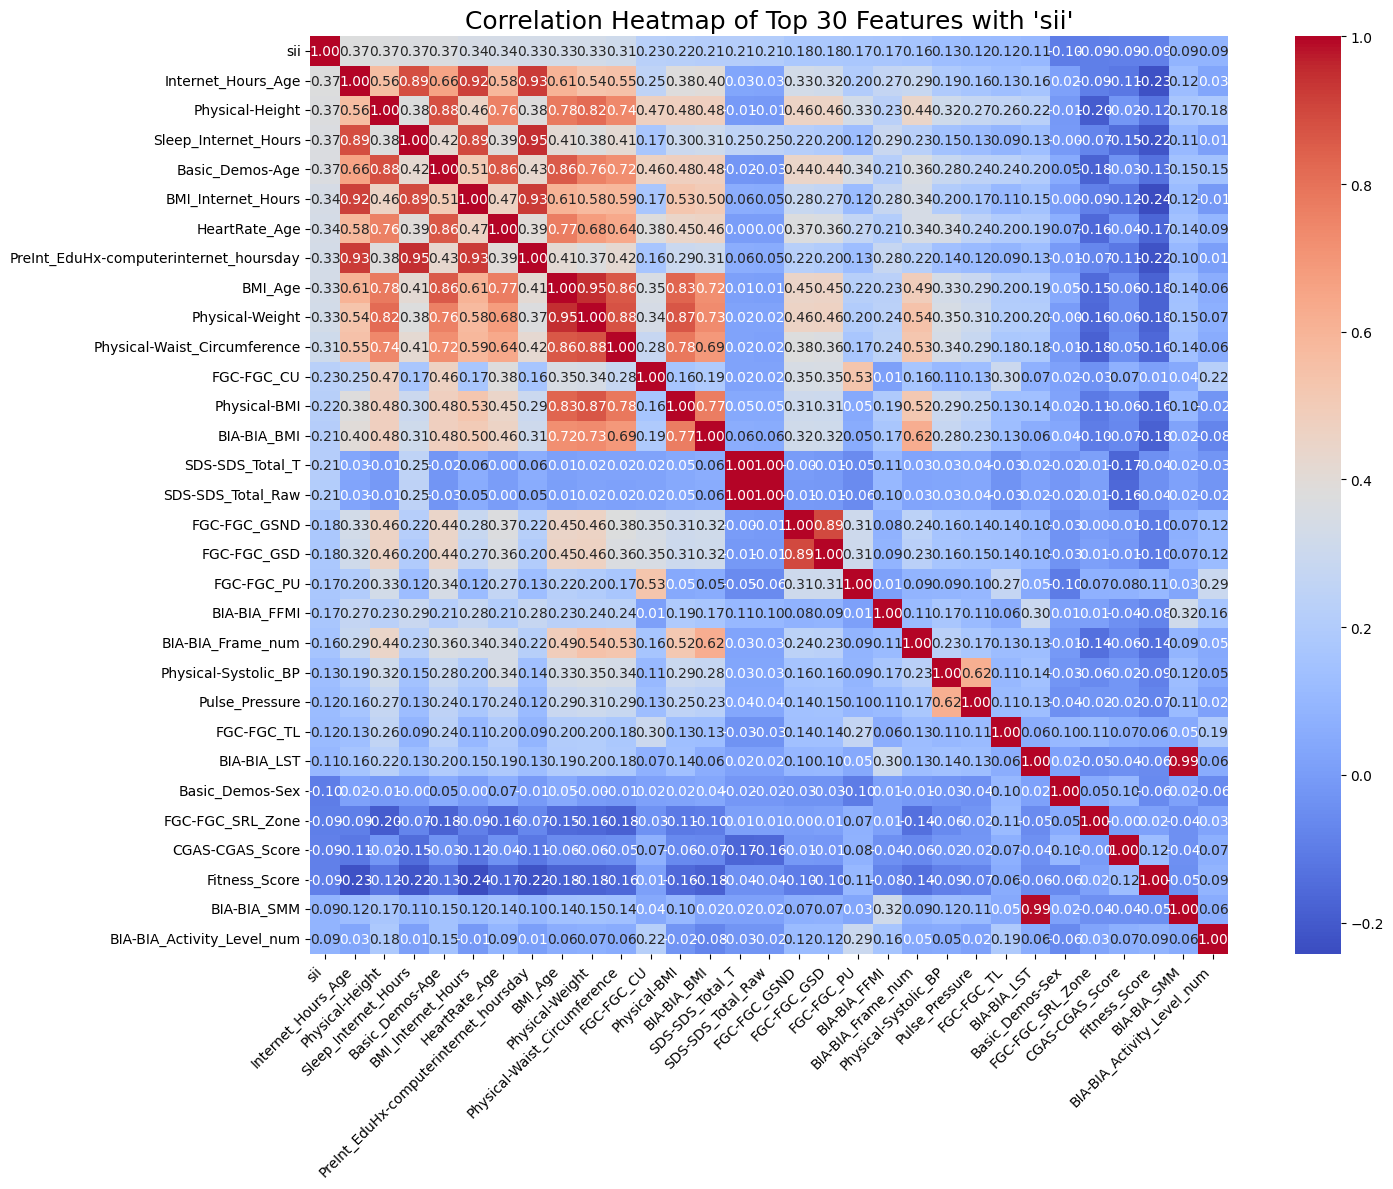

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Choose the target variable
target_variable = 'sii'

# Sort features by their absolute correlation with the target variable
k = 30
top_k_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).head(k + 1).index  # Top k (+1 for `sii`)

# Filter the correlation matrix for the top K features
top_k_corr_matrix = correlation_matrix.loc[top_k_features, top_k_features]

# Plot the heatmap for the top K features
plt.figure(figsize=(16, 12))
sns.heatmap(top_k_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
# sns.heatmap(top_k_corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title(f"Correlation Heatmap of Top {len(top_k_features) - 1} Features with '{target_variable}'", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
output_filename = "top_20_correlation_heatmap.jpg"
plt.savefig(output_filename, dpi=600, format="jpg")  # High resolution (300 dpi)
plt.show()


In [6]:
top_k_features

Index(['sii', 'Internet_Hours_Age', 'Physical-Height', 'Sleep_Internet_Hours',
       'Basic_Demos-Age', 'BMI_Internet_Hours', 'HeartRate_Age',
       'PreInt_EduHx-computerinternet_hoursday', 'BMI_Age', 'Physical-Weight',
       'Physical-Waist_Circumference', 'FGC-FGC_CU', 'Physical-BMI',
       'BIA-BIA_BMI', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'FGC-FGC_GSND',
       'FGC-FGC_GSD', 'FGC-FGC_PU', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num',
       'Physical-Systolic_BP', 'Pulse_Pressure', 'FGC-FGC_TL', 'BIA-BIA_LST',
       'Basic_Demos-Sex', 'FGC-FGC_SRL_Zone', 'CGAS-CGAS_Score',
       'Fitness_Score', 'BIA-BIA_SMM', 'BIA-BIA_Activity_Level_num'],
      dtype='object')

In [ ]:
featuresCols = [
    'Internet_Hours_Age', 'Physical-Height', 'Sleep_Internet_Hours', 'Basic_Demos-Age', 
    'BMI_Internet_Hours', 'HeartRate_Age', 'BMI_Age', 'Physical-Waist_Circumference', 
    'FGC-FGC_CU', 'BIA-BIA_BMI', 'SDS-SDS_Total_Raw', 'FGC-FGC_GSND', 'Physical-BMI', 
    'FGC-FGC_GSD', 'FGC-FGC_PU', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num', 'Physical-Systolic_BP', 
    'Pulse_Pressure', 'FGC-FGC_TL', 'Basic_Demos-Sex', 'FGC-FGC_SRL_Zone', 'CGAS-CGAS_Score', 
    'Fitness_Score', 'BIA-BIA_SMM', 'BIA-BIA_Activity_Level_num'
]

In [ ]:
# ==============================================
# Import Necessary Libraries
# ==============================================
import os
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
import re
from colorama import Fore, Style
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.base import clone
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from sklearn.impute import KNNImputer

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

# Set random seed and number of folds for cross-validation
SEED = 42
n_splits = 5

# ==============================================
# Define Functions for Time Series Processing
# ==============================================

def extract_behavioral_and_temporal_features(df):
    """
    Perform additional feature engineering focused on behavioral and temporal patterns.

    Parameters:
    - df (pd.DataFrame): Time series DataFrame.

    Returns:
    - pd.DataFrame: DataFrame with additional behavioral features.
    """
    # Handle idle_sleep_mode and non-wear periods
    df['time_diff'] = df.index.to_series().diff().dt.total_seconds().fillna(5)
    df['idle_gap_flag'] = (df['time_diff'] > 5).astype(int)  # Flag time gaps larger than 5 seconds
    df['non-wear_flag'] = df['non-wear_flag'].fillna(0).astype(int)  # Ensure non-wear_flag is boolean
    df['adjusted_non_wear_flag'] = (df['non-wear_flag'] | df['idle_gap_flag']).astype(int)

    # Derived features from non-wear and idle gaps
    total_time = len(df) * 5  # Total expected time in seconds
    non_wear_time = df['non-wear_flag'].sum() * 5  # Time when watch was not worn
    gap_time = df['time_diff'][df['idle_gap_flag'] == 1].sum()  # Time accounted for by gaps
    idle_gap_proportion = gap_time / total_time if total_time > 0 else 0
    non_wear_proportion = non_wear_time / total_time if total_time > 0 else 0

    # Detect charging during non-wear periods
    df['charging_flag'] = (df['battery_voltage'] > df['battery_voltage'].median()).astype(int)
    df['charging_during_non_wear'] = (df['adjusted_non_wear_flag'] & df['charging_flag']).astype(int)
    charging_during_non_wear_time = df['charging_during_non_wear'].sum() * 5 / total_time if total_time > 0 else 0

    # Define the kurtosis function
    def calculate_kurtosis(x):
        return kurtosis(x, nan_policy='omit')
    
    # Statistical feature engineering with named aggregation
    daily_features = df.resample('D').agg(
        X_mean=('X', 'mean'),
        X_std=('X', 'std'),
        X_max=('X', 'max'),
        X_min=('X', 'min'),
        X_median=('X', 'median'),
        X_skew=('X', 'skew'),
        X_kurtosis=('X', calculate_kurtosis),
        Y_mean=('Y', 'mean'),
        Y_std=('Y', 'std'),
        Y_max=('Y', 'max'),
        Y_min=('Y', 'min'),
        Y_median=('Y', 'median'),
        Y_skew=('Y', 'skew'),
        Y_kurtosis=('Y', calculate_kurtosis),
        Z_mean=('Z', 'mean'),
        Z_std=('Z', 'std'),
        Z_max=('Z', 'max'),
        Z_min=('Z', 'min'),
        Z_median=('Z', 'median'),
        Z_skew=('Z', 'skew'),
        Z_kurtosis=('Z', calculate_kurtosis),
        enmo_mean=('enmo', 'mean'),
        enmo_std=('enmo', 'std'),
        enmo_max=('enmo', 'max'),
        enmo_min=('enmo', 'min'),
        enmo_median=('enmo', 'median'),
        enmo_skew=('enmo', 'skew'),
        enmo_kurtosis=('enmo', calculate_kurtosis),
        light_mean=('light', 'mean'),
        light_std=('light', 'std'),
        light_max=('light', 'max'),
        light_min=('light', 'min'),
        light_median=('light', 'median'),
        light_skew=('light', 'skew'),
        battery_voltage_mean=('battery_voltage', 'mean'),
        battery_voltage_std=('battery_voltage', 'std'),
        battery_voltage_max=('battery_voltage', 'max'),
        battery_voltage_min=('battery_voltage', 'min'),
        battery_voltage_median=('battery_voltage', 'median'),
        adjusted_non_wear_flag_sum=('adjusted_non_wear_flag', 'sum'),
        charging_during_non_wear_sum=('charging_during_non_wear', 'sum')
    )

    # Add derived features
    daily_features['activity_count'] = (df['enmo'] > 0.1).resample('D').sum()
    daily_features['days_active'] = (df['adjusted_non_wear_flag'] == 0).resample('D').sum()
    daily_features['idle_gap_proportion'] = idle_gap_proportion
    daily_features['non_wear_proportion'] = non_wear_proportion
    daily_features['charging_during_non_wear_proportion'] = charging_during_non_wear_time

    # Frequency domain features using FFT
    for axis in ['X', 'Y', 'Z', 'enmo']:
        freq_features = np.fft.fft(df[axis].fillna(0))  # Handle NaNs during FFT
        daily_features[f'{axis}_dominant_freq'] = np.abs(freq_features).argmax()

    # Behavioral feature engineering
    df['day_of_week'] = df.index.dayofweek
    df['active_flag'] = (df['enmo'] > 0.1).astype(int)

    # Hourly activity distribution
    hourly_activity = df.resample('H').agg({'enmo': 'sum'}).reset_index()
    hourly_activity['hour'] = hourly_activity['time_of_day'].dt.hour
    hourly_features = hourly_activity.groupby('hour')['enmo'].mean().fillna(0)
    for hour in range(24):
        daily_features[f'enmo_hourly_avg_{hour}'] = hourly_features.get(hour, 0)

    # Weekday vs. Weekend activity
    weekday_features = df[df['day_of_week'] < 5].resample('D').mean().mean()
    weekend_features = df[df['day_of_week'] >= 5].resample('D').mean().mean()
    daily_features['weekday_avg_activity'] = weekday_features.get('enmo', 0)

    # Longest active period
    active_periods = (df['active_flag'] * (df['active_flag'] != df['active_flag'].shift())).cumsum()
    longest_active_period = active_periods.value_counts().max() if not active_periods.empty else 0
    daily_features['longest_active_period'] = longest_active_period

    # Daily variability (Coefficient of Variation)
    daily_features['activity_cv'] = daily_features['enmo_std'] / (daily_features['enmo_mean'] + 1e-6)

    # Reset index to retain 'id'
    daily_features.reset_index(inplace=True)

    def filter_feature_names(cols):
        return [col.replace('<', '').replace('>', '') for col in cols]

    daily_features.columns = filter_feature_names(daily_features.columns)

    return daily_features

def load_and_engineer_time_series(dirname):
    """
    Load and engineer behavioral features from time series.

    Parameters:
    - dirname (str): Directory containing the time series files.

    Returns:
    - pd.DataFrame: DataFrame with behavioral features for all files.
    """
    ids = os.listdir(dirname)
    feature_list = []

    for file in tqdm(ids):
        # Load and preprocess file
        df = pd.read_parquet(os.path.join(dirname, file, 'part-0.parquet'))
        df['time_of_day'] = pd.to_datetime(df['time_of_day'])
        df.set_index('time_of_day', inplace=True)

        # Perform feature engineering
        behavioral_features = extract_behavioral_and_temporal_features(df)
        behavioral_features['id'] = file.split('=')[1]  # Extract child ID
        feature_list.append(behavioral_features)

    # Concatenate all results into a single DataFrame
    features_df = pd.concat(feature_list, ignore_index=True)

    return features_df

# ==============================================
# Load and Merge Data
# ==============================================

# Load main datasets
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
sample = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv')

# Load and engineer time series data
train_ts = load_and_engineer_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_and_engineer_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet")

# Merge time series features with main datasets
train = pd.merge(train, train_ts, how="left", on='id')
test = pd.merge(test, test_ts, how="left", on='id')

# ==============================================
# Feature Engineering
# ==============================================

def engineer_features(df):
    """
    Create interaction features.

    Parameters:
    - df (pd.DataFrame): DataFrame to engineer features on.

    Returns:
    - pd.DataFrame: DataFrame with new features.
    """
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']

    df['Pulse_Pressure'] = df['Physical-Systolic_BP'] - df['Physical-Diastolic_BP']
    df['HeartRate_Age'] = df['Physical-HeartRate'] * df['Basic_Demos-Age']
    df['Fitness_Score'] = df['Fitness_Endurance-Max_Stage'] * (
            df['Fitness_Endurance-Time_Mins'] * 60 + df['Fitness_Endurance-Time_Sec']
    )
    df['FMI_FFMI_Ratio'] = df['BIA-BIA_FMI'] / (df['BIA-BIA_FFMI'] + 1e-6)
    df['Sleep_Internet_Hours'] = df['SDS-SDS_Total_T'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['Waist_Height_Ratio'] = df['Physical-Waist_Circumference'] / (df['Physical-Height'] + 1e-6)
    return df

# Apply feature engineering to both train and test datasets
train = engineer_features(train)
test = engineer_features(test)

# ==============================================
# Define Feature Columns
# ==============================================

# List of feature columns to be used
# Define featuresCols as the common columns between train and test
featuresCols = list(set(train.columns).intersection(set(test.columns)))
print(len(featuresCols), featuresCols)

# Include time series columns
time_series_cols = train_ts.columns.tolist()
time_series_cols.remove('id')  # Remove 'id' from the list
featuresCols += time_series_cols

if 'time_of_day' in featuresCols:
    featuresCols.remove('time_of_day')

# Select the features from train and test datasets
train = train[featuresCols + ['sii']]  # Include 'sii' in train features
test = test[featuresCols]

# Drop rows with missing target variable 'sii' in train data
train = train.dropna(subset=['sii'])

# ==============================================
# Handle Categorical Variables
# ==============================================

# List of categorical columns
cat_c = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 
    'PAQ_A-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'
]

def update_categorical(df):
    """
    Fill missing values and convert columns to categorical.

    Parameters:
    - df (pd.DataFrame): DataFrame to process.

    Returns:
    - pd.DataFrame: Processed DataFrame.
    """
    for c in cat_c: 
        df[c] = df[c].fillna('Missing')
        df[c] = df[c].astype('category')
    return df

# Update categorical columns in both datasets
train = update_categorical(train)
test = update_categorical(test)

def create_mapping(column, dataset):
    """
    Create a mapping for categorical variables.

    Parameters:
    - column (str): Column name.
    - dataset (pd.DataFrame): Dataset containing the column.

    Returns:
    - dict: Mapping dictionary.
    """
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

# Map categorical variables to integers
for col in cat_c:
    mapping_train = create_mapping(col, train)
    mapping_test = create_mapping(col, test)
    
    train[col] = train[col].replace(mapping_train).astype(int)
    test[col] = test[col].replace(mapping_test).astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

print(len(train.columns), train.columns)

print(len(numeric_features), numeric_features)

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title("Correlation Heatmap of Continuous Variables and SII", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
plt.savefig('correlation_heatmap.png')  # Save as an image if needed
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Choose the target variable
target_variable = 'sii'

# Sort features by their absolute correlation with the target variable
k = 20
top_k_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).head(k + 1).index  # Top k (+1 for `sii`)

# Filter the correlation matrix for the top K features
top_k_corr_matrix = correlation_matrix.loc[top_k_features, top_k_features]

# Plot the heatmap for the top K features
plt.figure(figsize=(14, 10))
# sns.heatmap(top_k_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
sns.heatmap(top_k_corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title(f"Correlation Heatmap of Top {len(top_k_features) - 1} Features with '{target_variable}'", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
plt.savefig('top_k_correlation_heatmap.png')  # Save as an image if needed
plt.show()


In [ ]:
# Select only numerical features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train[numeric_features].corr()

# Choose the target variable
target_variable = 'sii'

# Sort features by their absolute correlation with the target variable
k = 20
top_k_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).head(k + 1).index  # Top k (+1 for `sii`)

# Deduplicate features
unique_top_k_features = list(dict.fromkeys(top_k_features))  # Ensures only unique features are kept

# Filter the correlation matrix for the unique top K features
unique_top_k_corr_matrix = correlation_matrix.loc[unique_top_k_features, unique_top_k_features]

# Plot the heatmap for the unique top K features
plt.figure(figsize=(14, 10))
sns.heatmap(unique_top_k_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title(f"Correlation Heatmap of Top {len(unique_top_k_features) - 1} Features with '{target_variable}'", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Save or show the heatmap
plt.tight_layout()
plt.savefig('unique_top_k_correlation_heatmap.png')  # Save as an image if needed
plt.show()


In [ ]:
import numpy as np

# Step 1: Remove duplicate features
def remove_duplicate_features(train, test):
    duplicate_features = []
    for col in train.columns:
        if col != 'sii' and train[col].equals(test[col]):
            duplicate_features.append(col)
    train = train.drop(columns=duplicate_features)
    test = test.drop(columns=duplicate_features)
    print(f"Removed {len(duplicate_features)} duplicate features: {duplicate_features}")
    return train, test

# Step 2: Remove collinear features based on a correlation threshold
def remove_collinear_features(train, test, threshold=0.95):
    # Select only numeric columns in train
    numeric_columns_train = train.select_dtypes(include=[np.number]).columns
    
    # Ensure only columns common to train and test are considered
    numeric_columns = numeric_columns_train.intersection(test.columns)
    
    train_numeric = train[numeric_columns]
    test_numeric = test[numeric_columns]
    
    # Compute absolute correlation matrix
    corr_matrix = train_numeric.corr().abs()
    
    # Identify upper triangle of the correlation matrix
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    
    # Find collinear features
    collinear_features = [
        column for i, column in enumerate(corr_matrix.columns)
        if any(corr_matrix.iloc[:, i][upper_triangle[:, i]] > threshold)
    ]
    
    # Drop collinear features from both train and test
    train = train.drop(columns=collinear_features)
    test = test.drop(columns=[col for col in collinear_features if col in test.columns])
    
    print(f"Removed {len(collinear_features)} collinear features: {collinear_features}")
    return train, test

# Print initial feature counts
print(f"Initial train shape: {train.shape}")
print(f"Initial test shape: {test.shape}")

# Apply both steps
train2, test2 = remove_duplicate_features(train, test)
train3, test3 = remove_collinear_features(train, test)
train4, test4 = remove_collinear_features(train2, test2)

# # Print final feature counts
# print(f"Final train shape: {train.shape}")
# print(f"Final test shape: {test.shape}")

# # Print final feature counts
# print(f"Final train2 shape: {train2.shape}")
# print(f"Final test2 shape: {test2.shape}")

# # Print final feature counts
# print(f"Final train3 shape: {train3.shape}")
# print(f"Final test3 shape: {test3.shape}")

# Print final feature counts
print(f"Final train shape: {train4.shape}")
print(f"Final test shape: {test4.shape}")


In [ ]:
train4.columns

In [ ]:
x_cols = train.columns.intersection(train4.columns)
x_cols, len(x_cols)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import math

import warnings

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")

# ==============================================
# Load and Merge Data
# ==============================================

# Load main datasets
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
sample = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv')

# Load and engineer time series data
train_ts = load_and_engineer_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_and_engineer_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet")

# Merge time series features with main datasets
train = pd.merge(train, train_ts, how="left", on='id')
test = pd.merge(test, test_ts, how="left", on='id')

# ==============================================
# Feature Engineering
# ==============================================

def engineer_features(df):
    """
    Create interaction features.

    Parameters:
    - df (pd.DataFrame): DataFrame to engineer features on.

    Returns:
    - pd.DataFrame: DataFrame with new features.
    """
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    
    df['Pulse_Pressure'] = df['Physical-Systolic_BP'] - df['Physical-Diastolic_BP']
    df['HeartRate_Age'] = df['Physical-HeartRate'] * df['Basic_Demos-Age']
    df['Fitness_Score'] = df['Fitness_Endurance-Max_Stage'] * (
        df['Fitness_Endurance-Time_Mins'] * 60 + df['Fitness_Endurance-Time_Sec']
    )
    df['FMI_FFMI_Ratio'] = df['BIA-BIA_FMI'] / (df['BIA-BIA_FFMI'] + 1e-6)
    df['Sleep_Internet_Hours'] = df['SDS-SDS_Total_T'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['Waist_Height_Ratio'] = df['Physical-Waist_Circumference'] / (df['Physical-Height'] + 1e-6)
    return df

# Apply feature engineering to both train and test datasets
train = engineer_features(train)
test = engineer_features(test)

# ==============================================
# Define Feature Columns
# ==============================================

# List of feature columns to be used
featuresCols = [
    'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
    'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
    'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
    'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
    'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
    'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
    'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
    'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
    'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
    'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
    'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
    'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
    'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
    'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
    'PAQ_C-PAQ_C_Total', 'SDS-Season', 'SDS-SDS_Total_Raw',
    'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
    'PreInt_EduHx-computerinternet_hoursday', 'BMI_Age', 'Internet_Hours_Age', 'BMI_Internet_Hours', 'sii'
]

# Include time series columns
time_series_cols = train_ts.columns.tolist()
time_series_cols.remove('id')  # Remove 'id' from the list
featuresCols = time_series_cols + featuresCols

if 'time_of_day' in featuresCols:
    featuresCols.remove('time_of_day')

# Select the features from train and test datasets
train = train[featuresCols]
test = test[featuresCols[:-1]]  # Exclude 'sii' from test features

# Drop rows with missing target variable 'sii' in train data
train = train.dropna(subset=['sii'])

# ==============================================
# Handle Categorical Variables
# ==============================================

# List of categorical columns
cat_c = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 
    'PAQ_A-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'
]

def update_categorical(df):
    """
    Fill missing values and convert columns to categorical.

    Parameters:
    - df (pd.DataFrame): DataFrame to process.

    Returns:
    - pd.DataFrame: Processed DataFrame.
    """
    for c in cat_c: 
        df[c] = df[c].fillna('Missing')
        df[c] = df[c].astype('category')
    return df

# Update categorical columns in both datasets
train = update_categorical(train)
test = update_categorical(test)

def create_mapping(column, dataset):
    """
    Create a mapping for categorical variables.

    Parameters:
    - column (str): Column name.
    - dataset (pd.DataFrame): Dataset containing the column.

    Returns:
    - dict: Mapping dictionary.
    """
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

# Map categorical variables to integers
for col in cat_c:
    mapping_train = create_mapping(col, train)
    mapping_test = create_mapping(col, test)
    
    train[col] = train[col].replace(mapping_train).astype(int)
    test[col] = test[col].replace(mapping_test).astype(int)

print(f'Train Shape : {train.shape} || Test Shape : {test.shape}')


train_df = train
# data_dictionary = pd.read_csv('data_dictionary.csv')
print(train_df.shape)

# List of continuous columns based on your data
continuous_columns = [
    'BIA-BIA_BMC','PCIAT-PCIAT_Total','Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
    'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_SRL', 'FGC-FGC_SRR',
    'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
    'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
    'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
    'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total'
]

# Select only the continuous columns and the sii target
data_continuous = train_df[continuous_columns + ['sii']]

# Remove rows where sii is NaN, but keep NaNs in continuous variables
data_continuous = data_continuous.dropna(subset=['sii'])

# Melt the data to long format for Seaborn
data_long = pd.melt(data_continuous, id_vars='sii', var_name="variable", value_name="value")

# Set up the FacetGrid for KDE plots with increased figure size
g = sns.FacetGrid(data_long, col="variable", col_wrap=4, height=3.5, aspect=1.2, sharex=False, sharey=False)

# Map KDE plots onto the grid, using hue for sii target
g.map_dataframe(sns.kdeplot, x="value", hue="sii", fill=True, common_norm=False, palette="Set2", alpha=0.4, linewidth=1.5)

# Add title, adjust layout
g.fig.suptitle("Distribution of Continuous Fitness and Health Metrics by SII Target", y=1.05, fontsize=18, color="#804080")
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Density")

# Create custom legend
# Define the labels and colors (matching `palette="Set2"` used above)
sii_labels = sorted(data_continuous['sii'].dropna().unique())
colors = sns.color_palette("Set2", len(sii_labels))
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'SII {label}') for color, label in zip(colors, sii_labels)]

# Position the custom legend outside of the grid
g.fig.legend(handles=legend_elements, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.tight_layout()
plt.show()

# Select a subset of continuous columns for pairwise visualization (to avoid overcrowding)
selected_columns = ['Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight']

# Include the sii column for hue
pairplot_data = train_df[selected_columns + ['sii']].dropna()

# Pairplot with hue based on 'sii'
sns.pairplot(pairplot_data, hue='sii', palette="Set2", diag_kind='kde', plot_kws={'alpha': 0.6})

# Set title
plt.suptitle("Pairwise Joint Distributions of Selected Features by SII", y=1.02, fontsize=16)
plt.show()
